# ❓ <font color='green'><u> PROBLEM STATEMENT (Multi Linear Regression_50_startups_Data) </u>

### Prepare a prediction model for profit of 50_startups data.
#### Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.


* R&D Spend -- Research and devolop spend in the past few years
* Administration -- spend on administration in the past few years
* Marketing Spend -- spend on Marketing in the past few years
* State -- states from which data is collected
* Profit  -- profit of each state in the past few years

---

* ### <font color = 'blue'> <u> IMPORT NECESSARY LIBRARIES </u>

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_theme(style='darkgrid', palette='pastel')

* ### <font color = 'blue'> <u> READ DATA </u>

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/SwatiVPatil/Data_sets/main/50_Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


* ### <font color = 'blue'> <u> PERFORM EDA </u>

* ##### <u>Data Summary</u>

In [4]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


* ##### <u>Missing Values Imputation if any</u>

In [6]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

#### Visualisation of Null Values 

<AxesSubplot:>

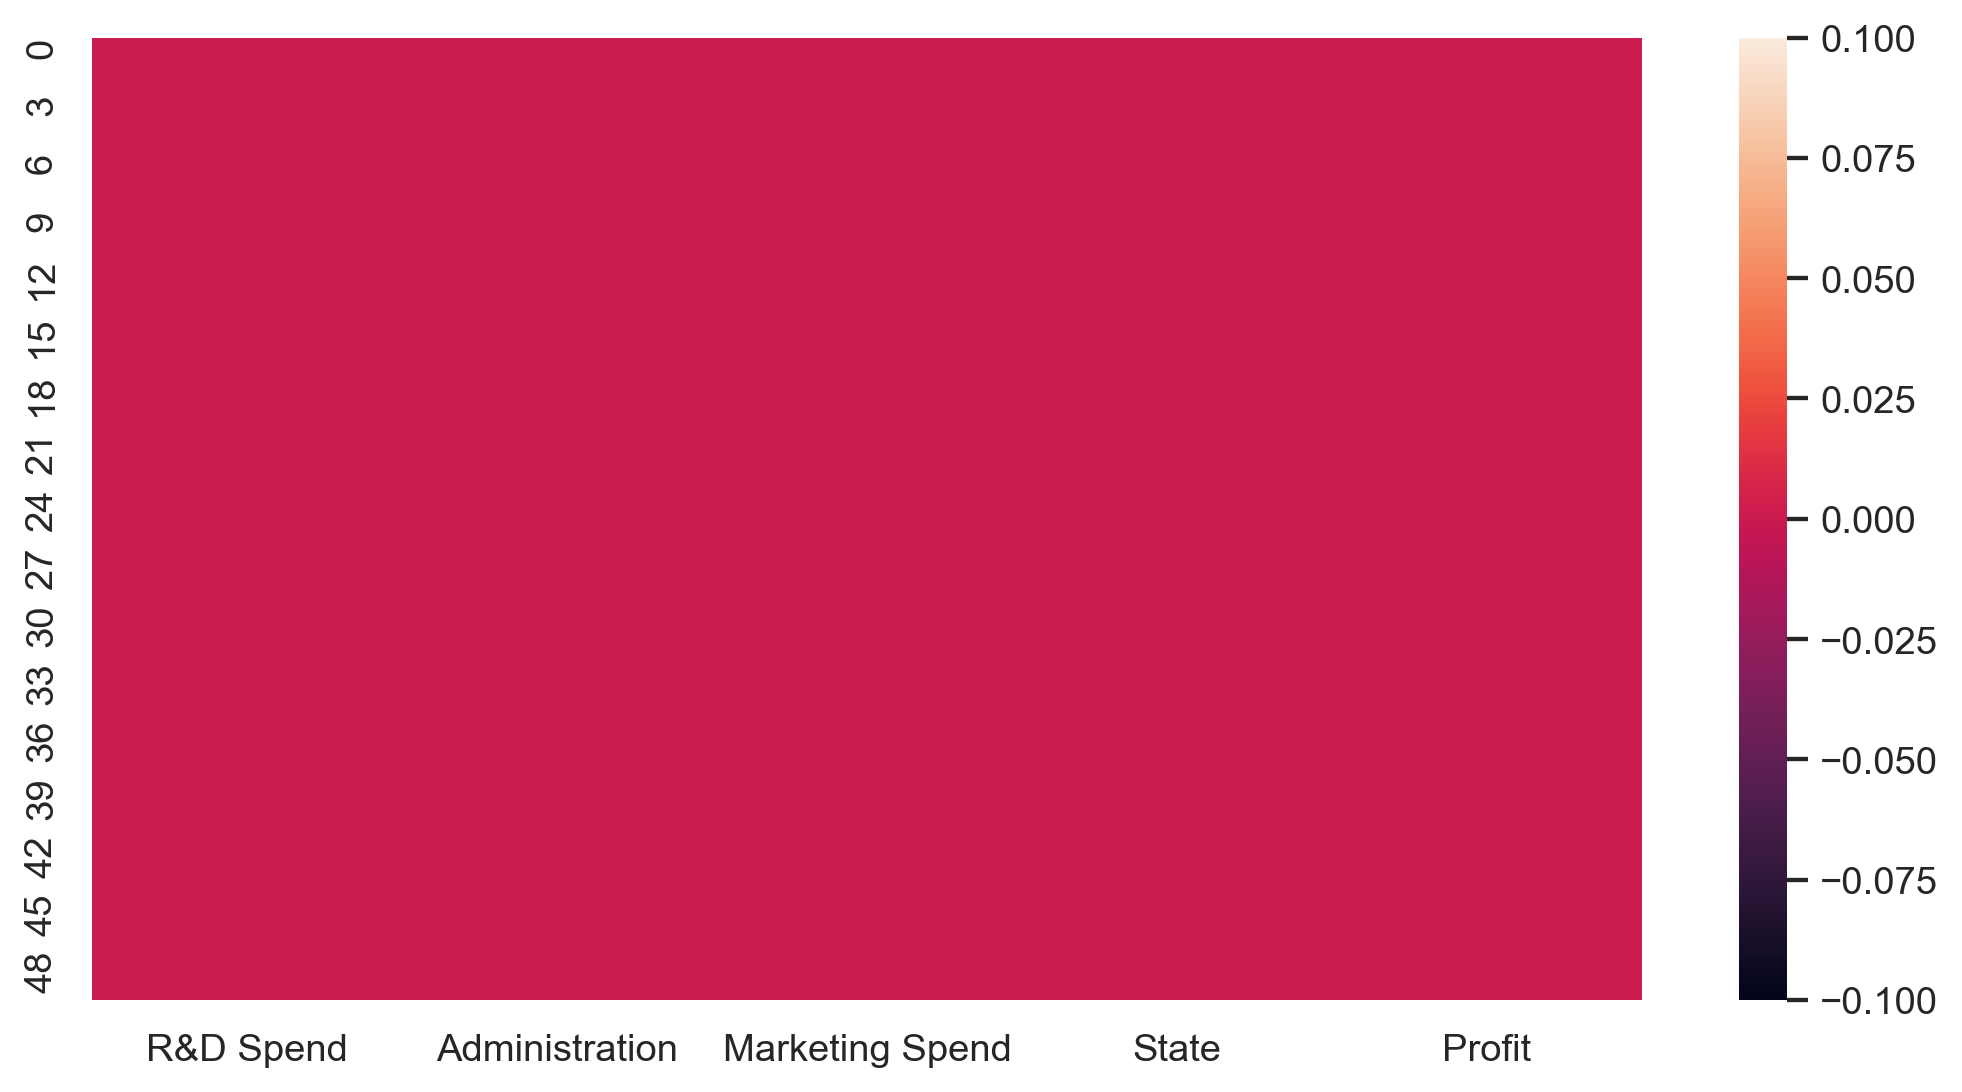

In [7]:
sns.heatmap(df.isna())

* ##### <u> Checking for Duplicate Records and Removing if any </u>

In [8]:
df.duplicated().sum()

0

* ##### <u>Renaming Columns for ease of Use </u>

In [9]:
df.rename(columns= {'R&D Spend':'RnD', 'Administration': 'Admin', 'Marketing Spend': 'Marketing'}, inplace= True)

In [10]:
df.columns

Index(['RnD', 'Admin', 'Marketing', 'State', 'Profit'], dtype='object')

* ##### <u> Let's Check For Unique Values </u>

In [11]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

> * ##### All Variables have relevant data-type. 
> * ##### No Missing Values found and total number of records = 50.
> * ##### No duplicate record found.
> * ##### In Descriptive statistics we can see mean and median values are nearly same but there may be presence of outliers in "Marketing" and "RnD" variable.
> * ##### And also some variables have minimum value 0 that may be the case where absolutely no money spent. 
> * ##### "State" Variable have 3 unique values with same distribution.

* ### <font color = 'blue'> <u> DATA VISUALISATION </u>

* #####  <u>Boxplot for Continuous Data Variables</u>  

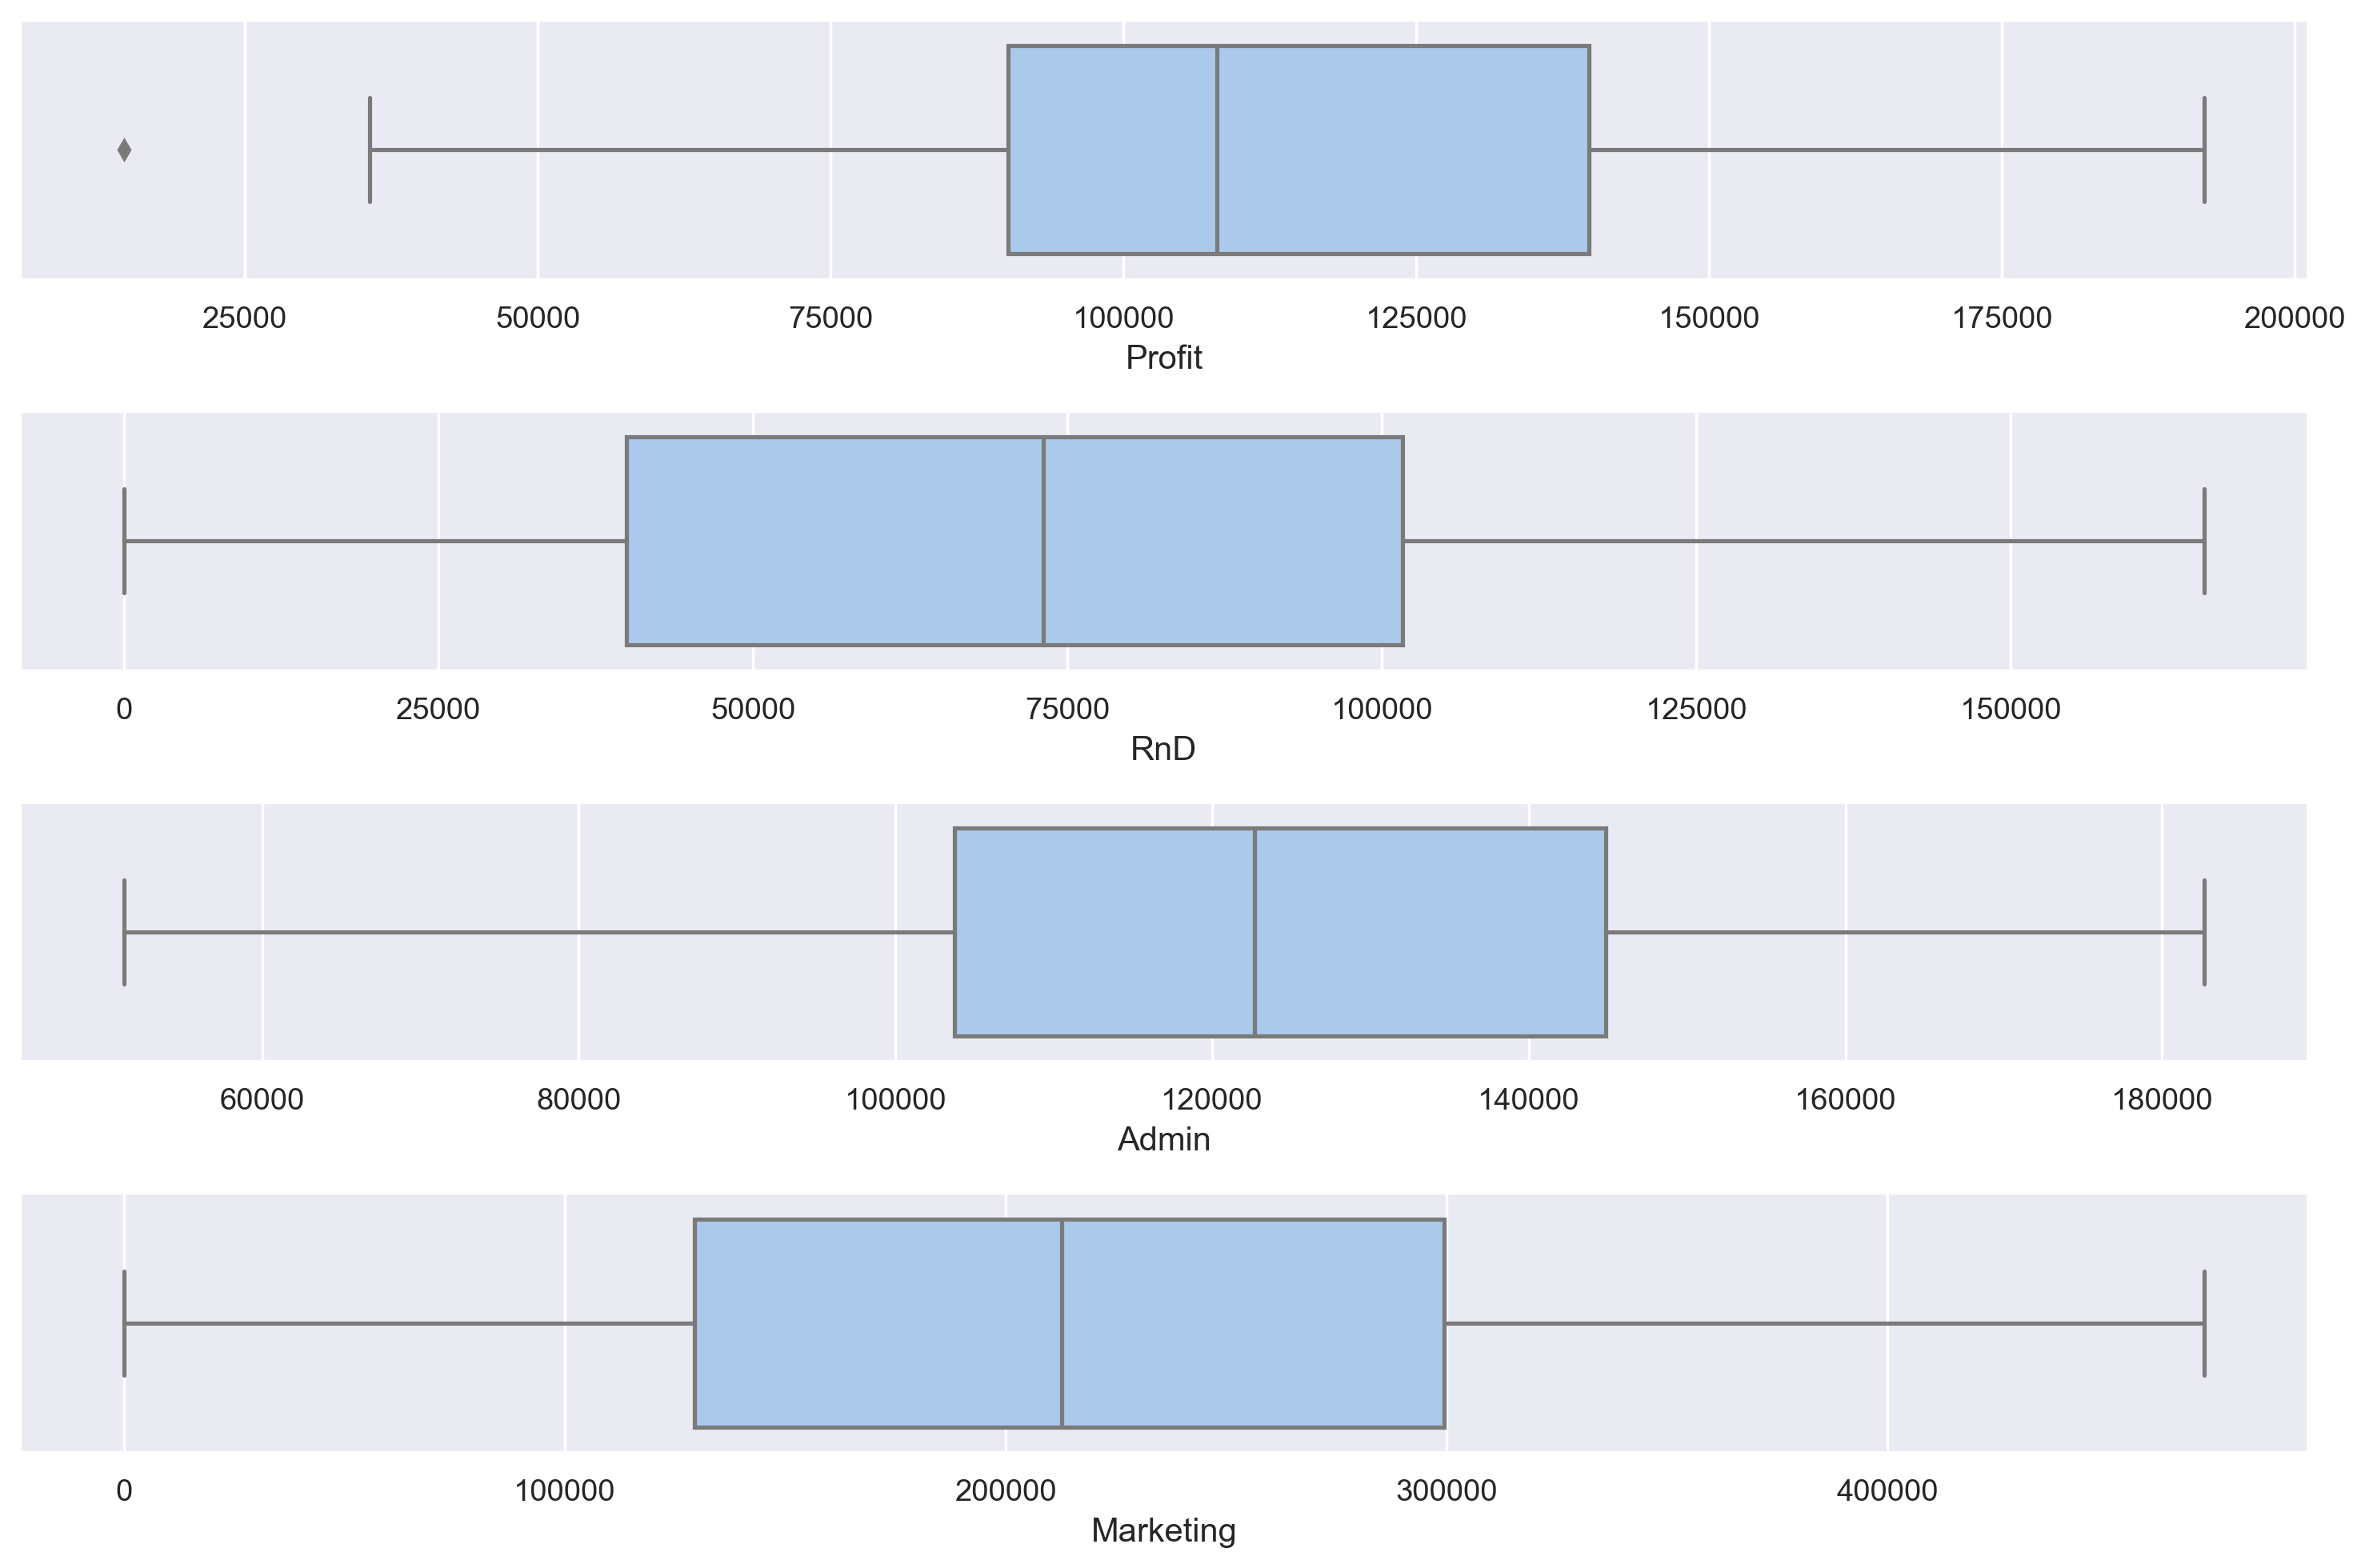

In [12]:
fig, index = plt.subplots(4,1, figsize= (12,8))

sns.boxplot(df['Profit'], ax= index[0])
sns.boxplot(df['RnD'], ax= index[1])
sns.boxplot(df['Admin'], ax= index[2])
sns.boxplot(df['Marketing'], ax= index[3])

plt.tight_layout()

> *  #### Here we can see there is an Outlier Data Point at Lower Extreme of "Price" variable but we are not going to remove it at this stage cause all the Outliers are not Influencers.
> * #### Influencer Data Points are those data points which cause to deviate <u> Linear Regression Line </u> from its actual  position with respect to normal range of data.

* #####  <u>Distribution Plot for Continuous Data Variables</u>  

<AxesSubplot:xlabel='Marketing', ylabel='Count'>

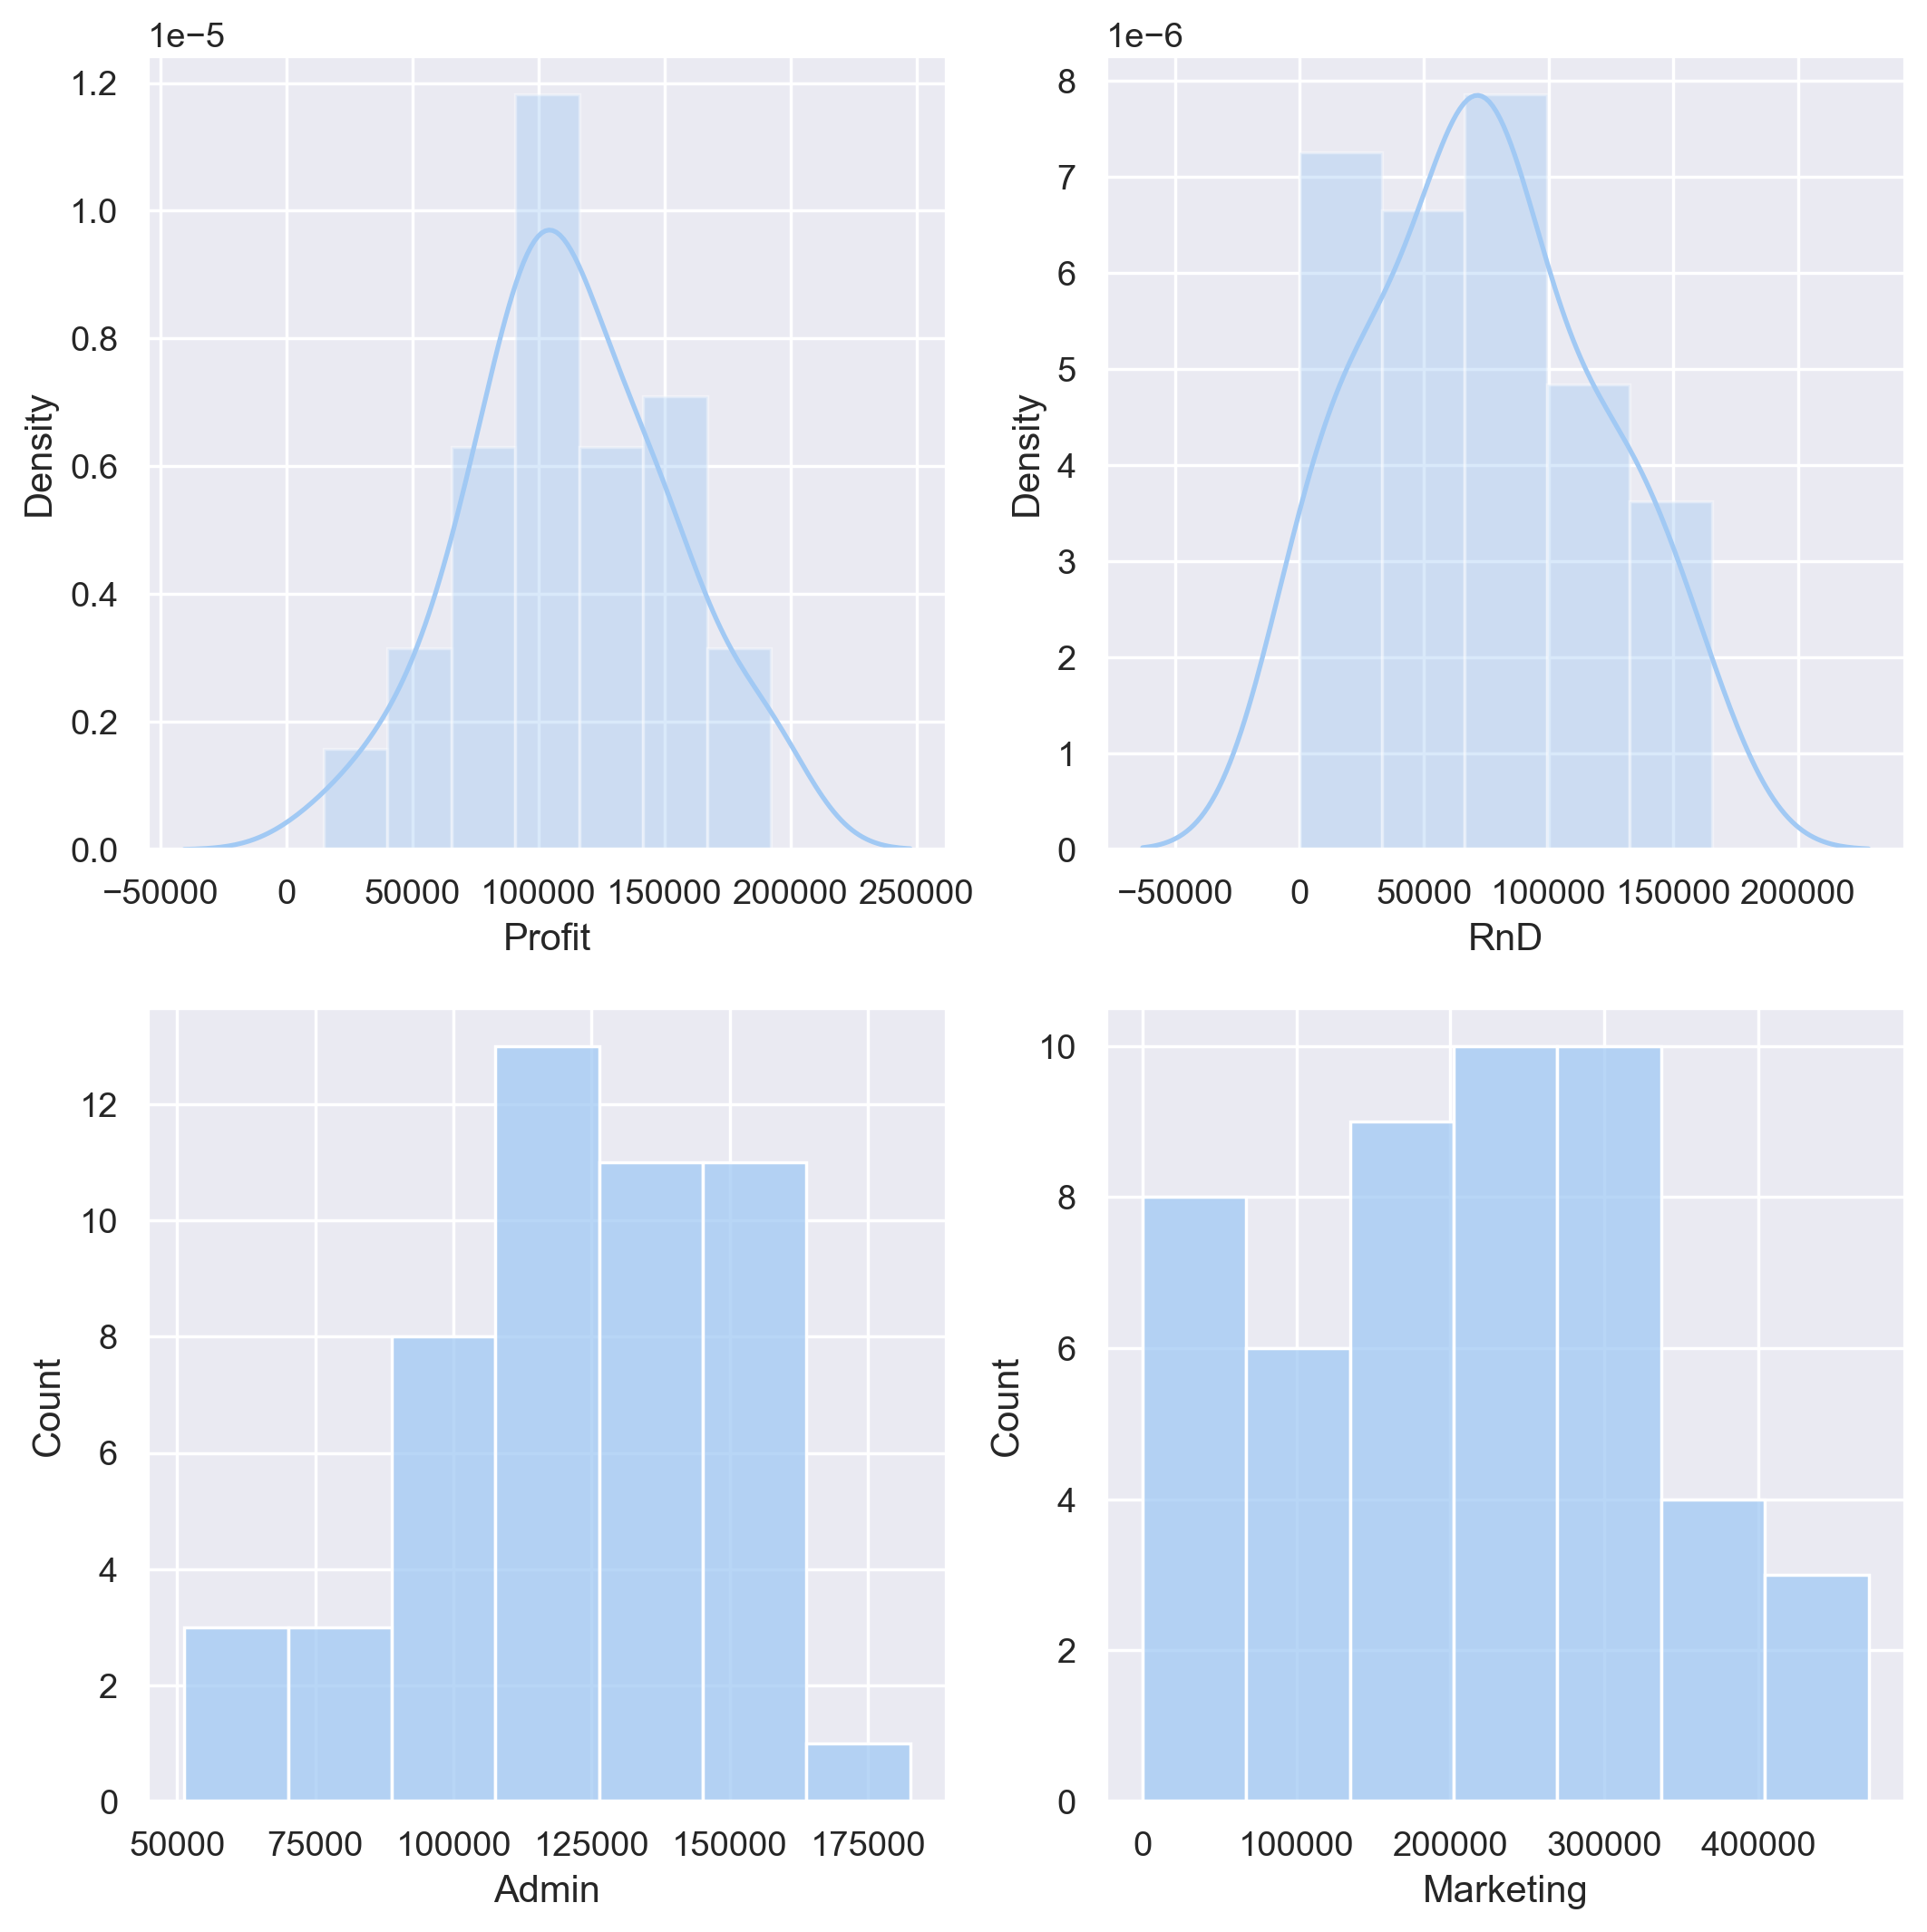

In [13]:
fig, index = plt.subplots(2,2, figsize= (10,10))

sns.distplot(df['Profit'], ax = index[0,0])

sns.distplot(df['RnD'], ax = index[0,1])

sns.histplot(df['Admin'], ax = index[1,0])

sns.histplot(df['Marketing'], ax = index[1,1])

> * #### Skewness : "Profit" and "RnD" have not much skewness, "Marketing" have Positive Skewness and "Admin" have Negative Skewness

* ##### <u> Count Plot For Discrete Data </u>

<AxesSubplot:xlabel='State', ylabel='count'>

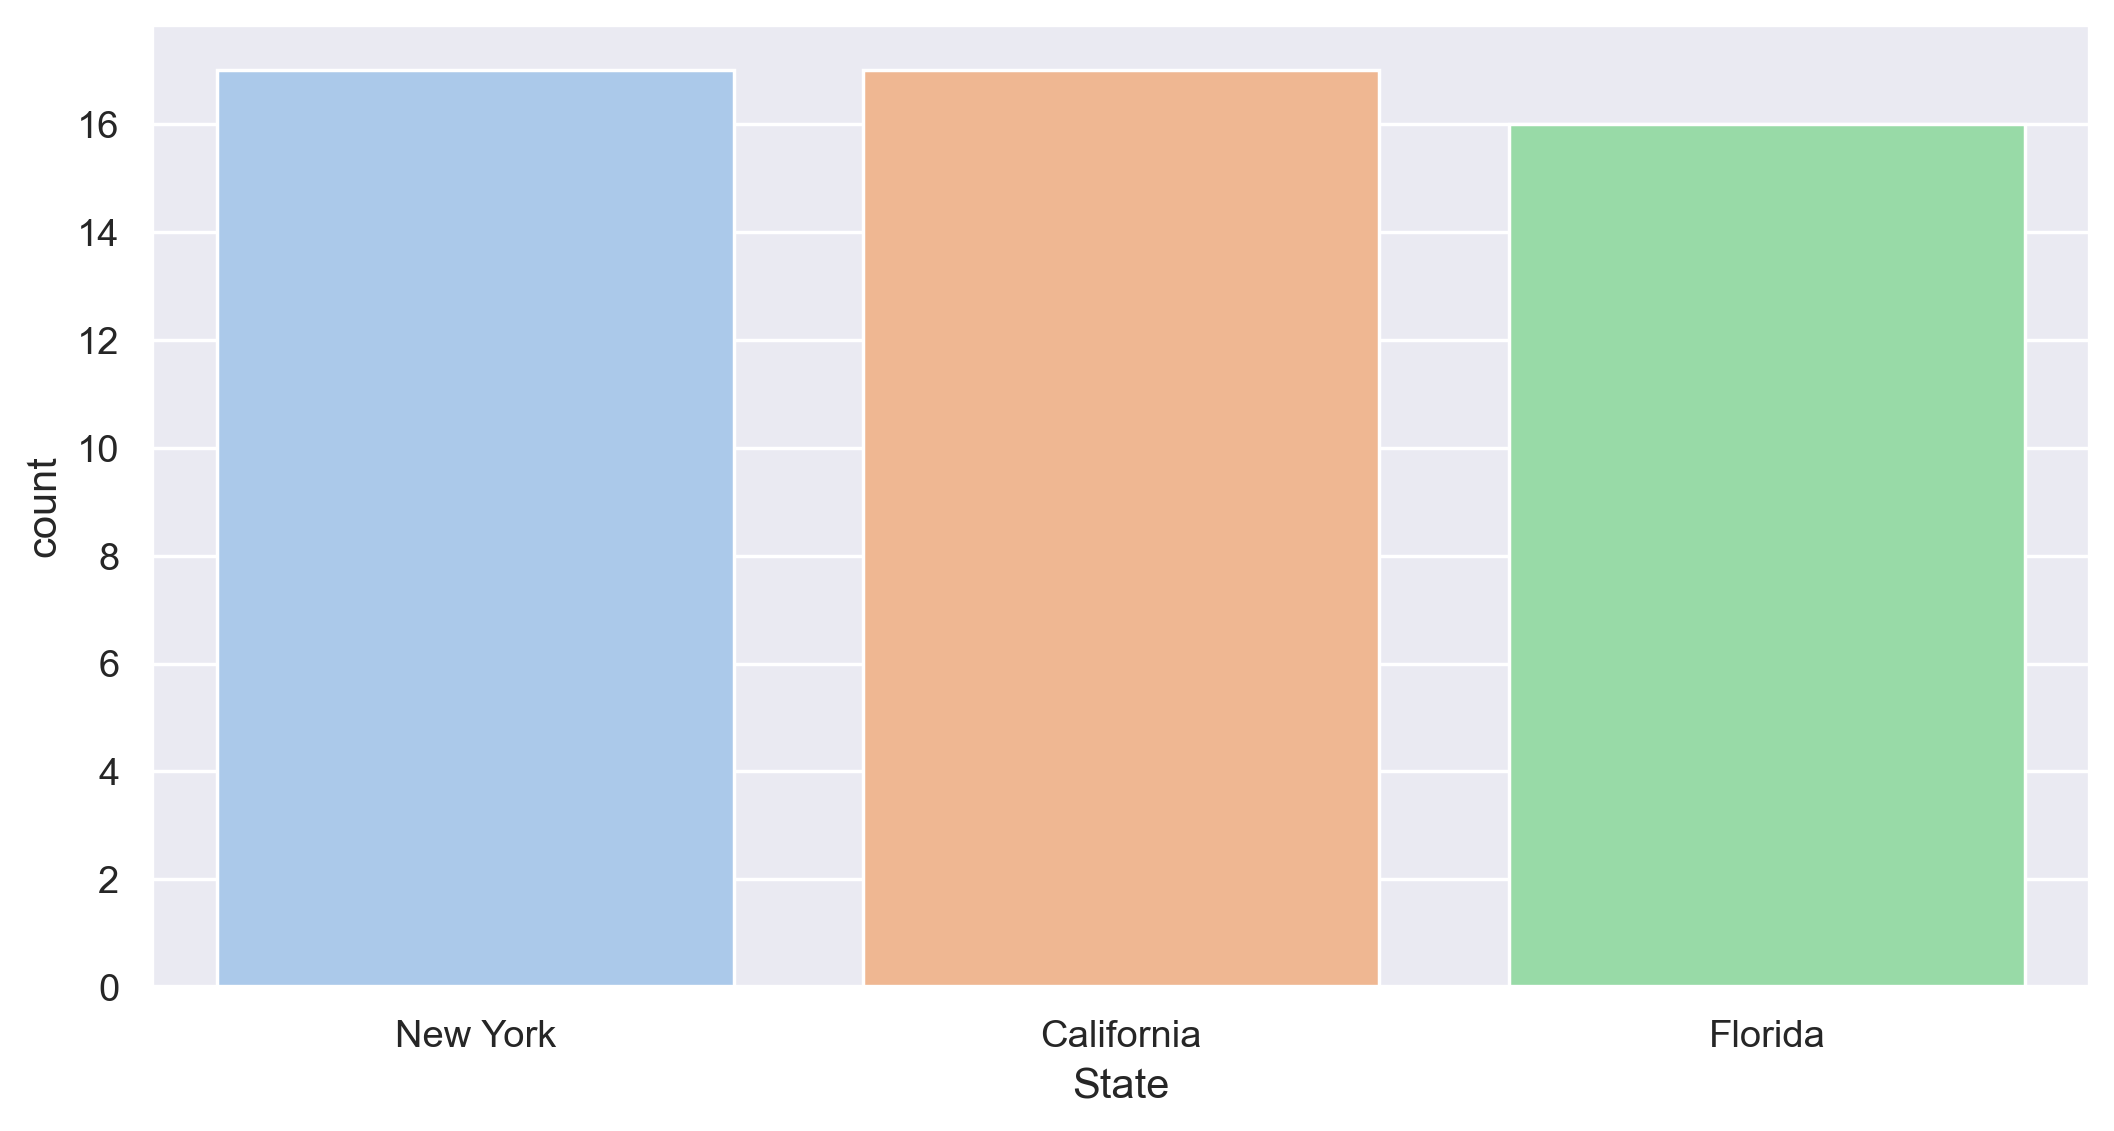

In [14]:
sns.countplot(df['State'])

> * #### All the 3 Categories of "State" Variables are equally distributed.

* ### <font color = 'blue'> <b><u> CORRELATION ANALYSIS </u></b>

### Let's Check Correlation and  Multicolinearity 
- #### Is there any relation between Each Independent Variable with Dependent Variable (Correlation) and relation between Independent Variables themselves(Multicolinearity).
- #### <u>Assumptions about Predictors</u> : 1. Independent Variables should non-ramdom 2. Linearly independent to each other, i.e. they should not have correlation between themselves.

* ##### <U>Scatterplot</U>

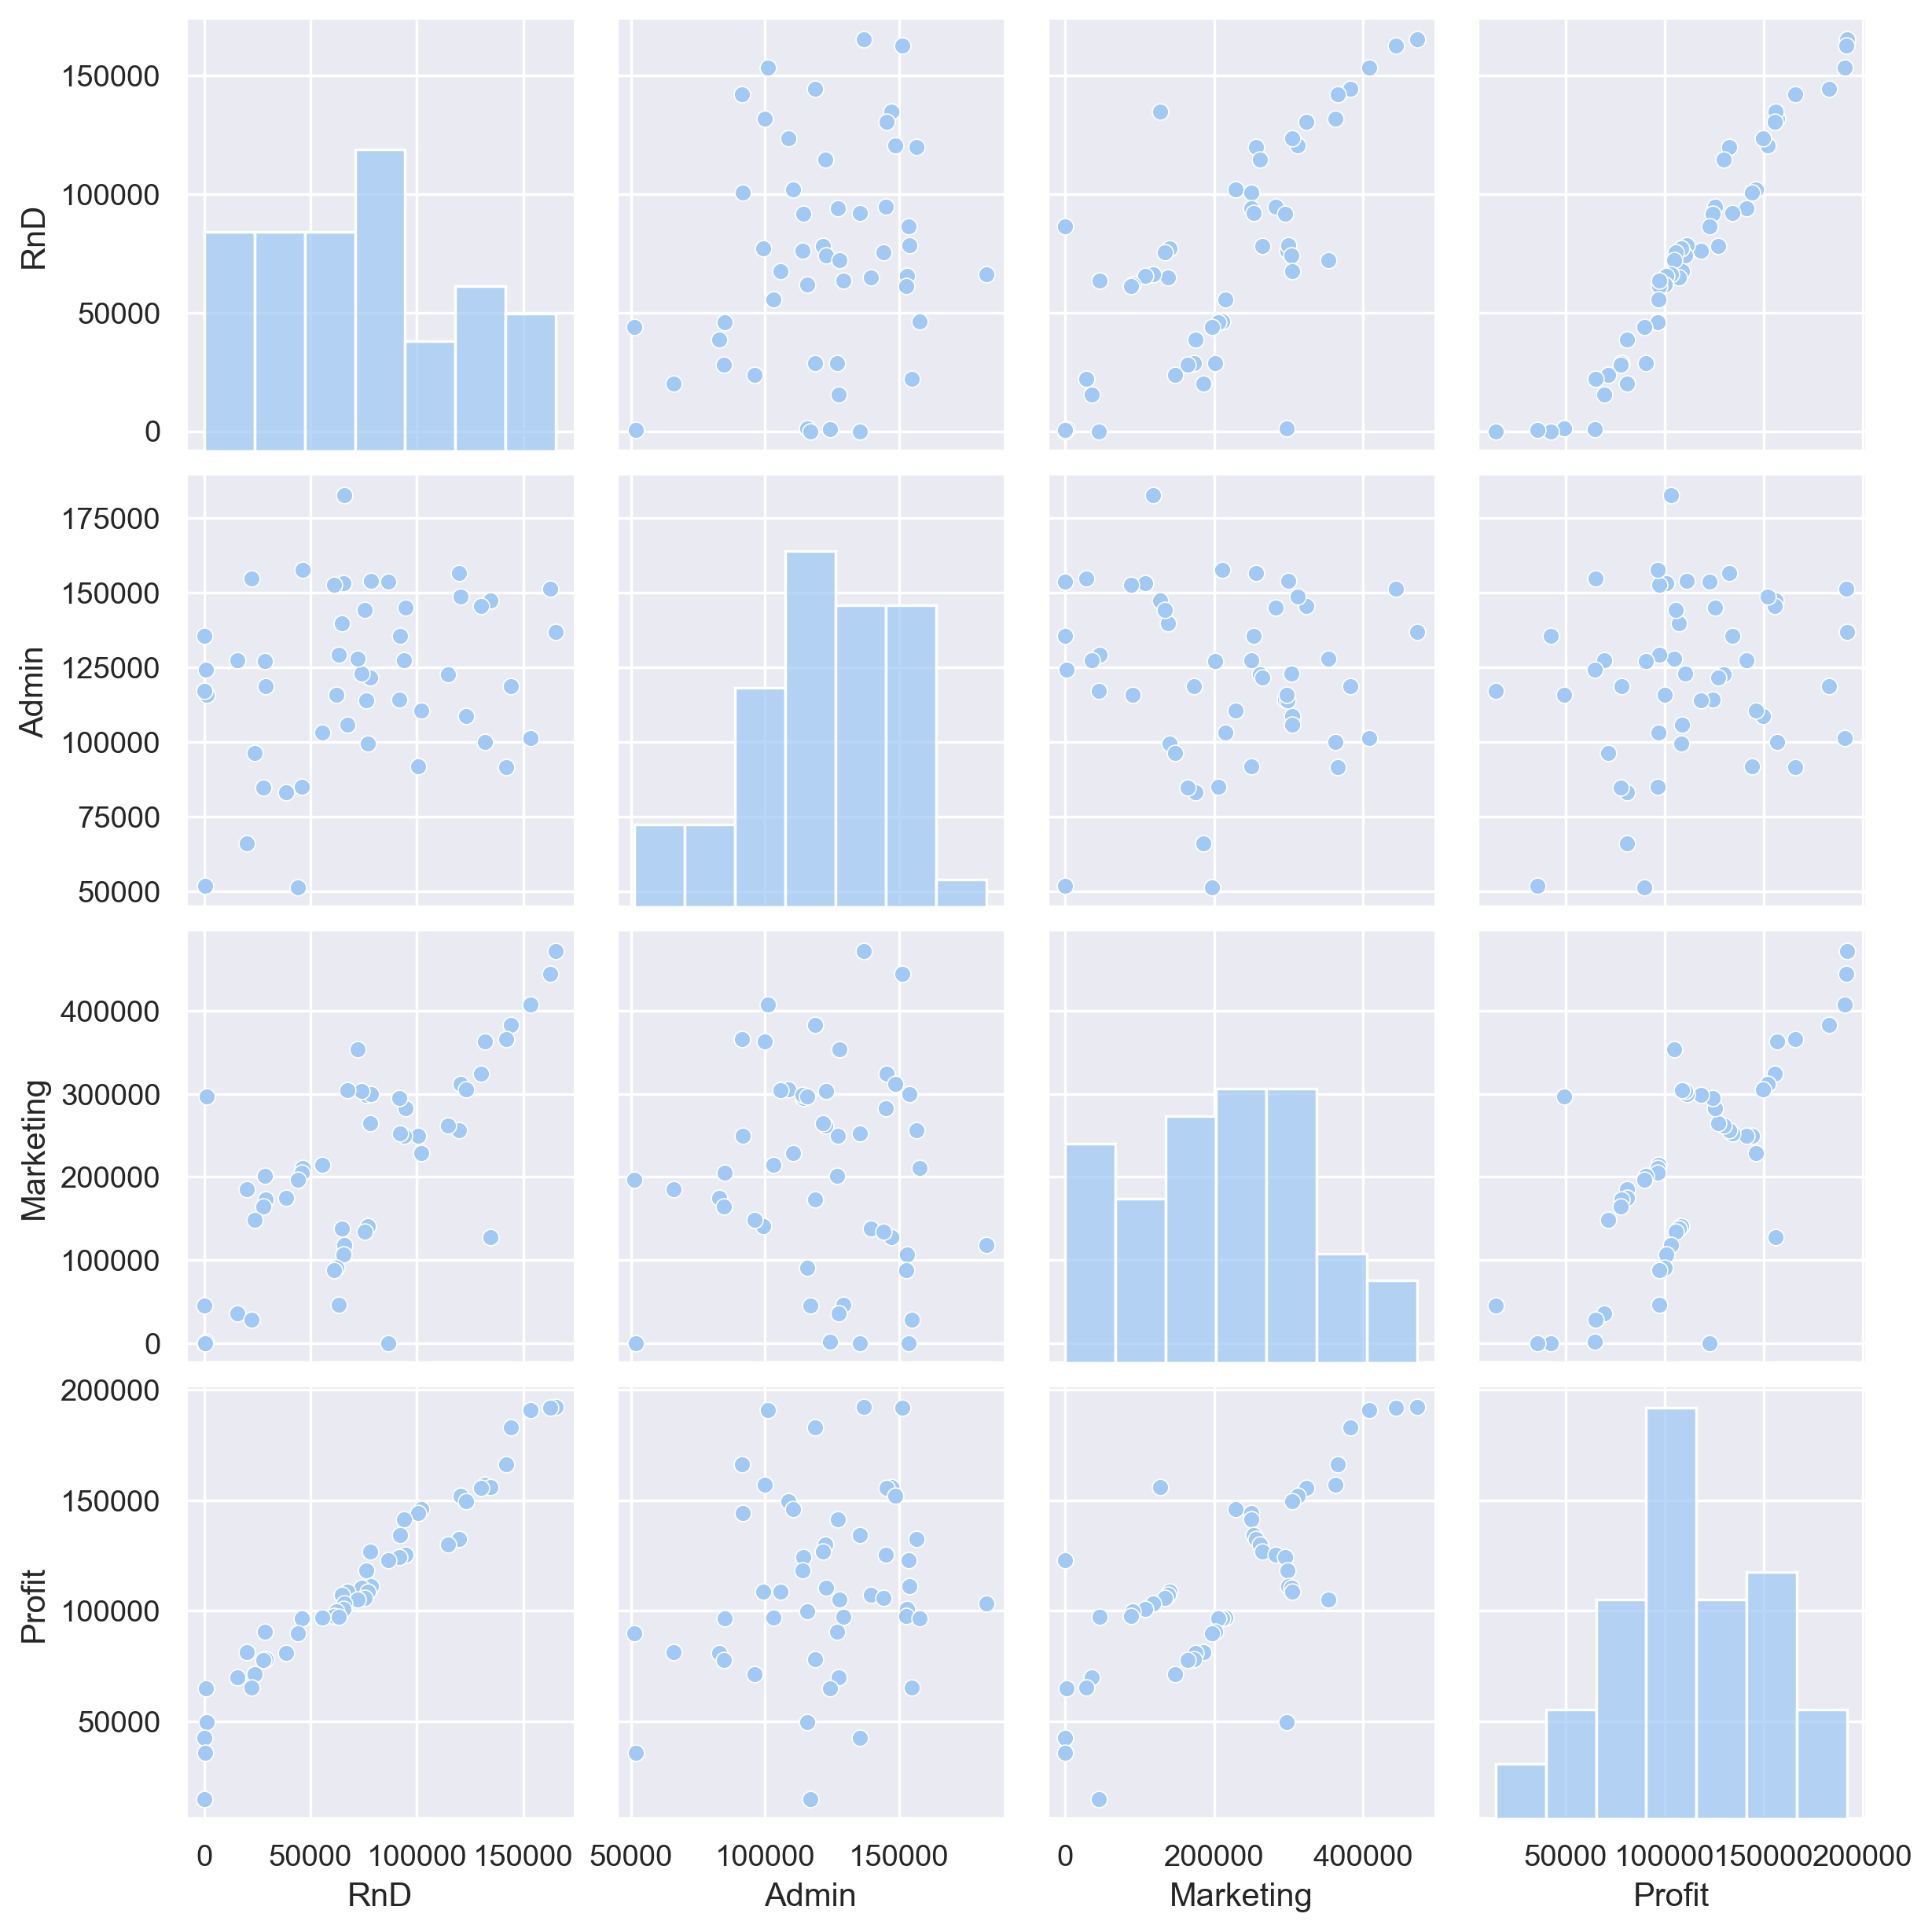

In [15]:
sns.pairplot(df)

> * #### Here in Pairplot we can clearly see correlation of our target variable "Profit" with idependent variables "RnD" and "Marketing". 
> *  #### Also there is some trend in "Marketing" and "RnD"


* ##### <U>Distribution of "Profit" with respect to "State"</U>

<AxesSubplot:xlabel='State', ylabel='Profit'>

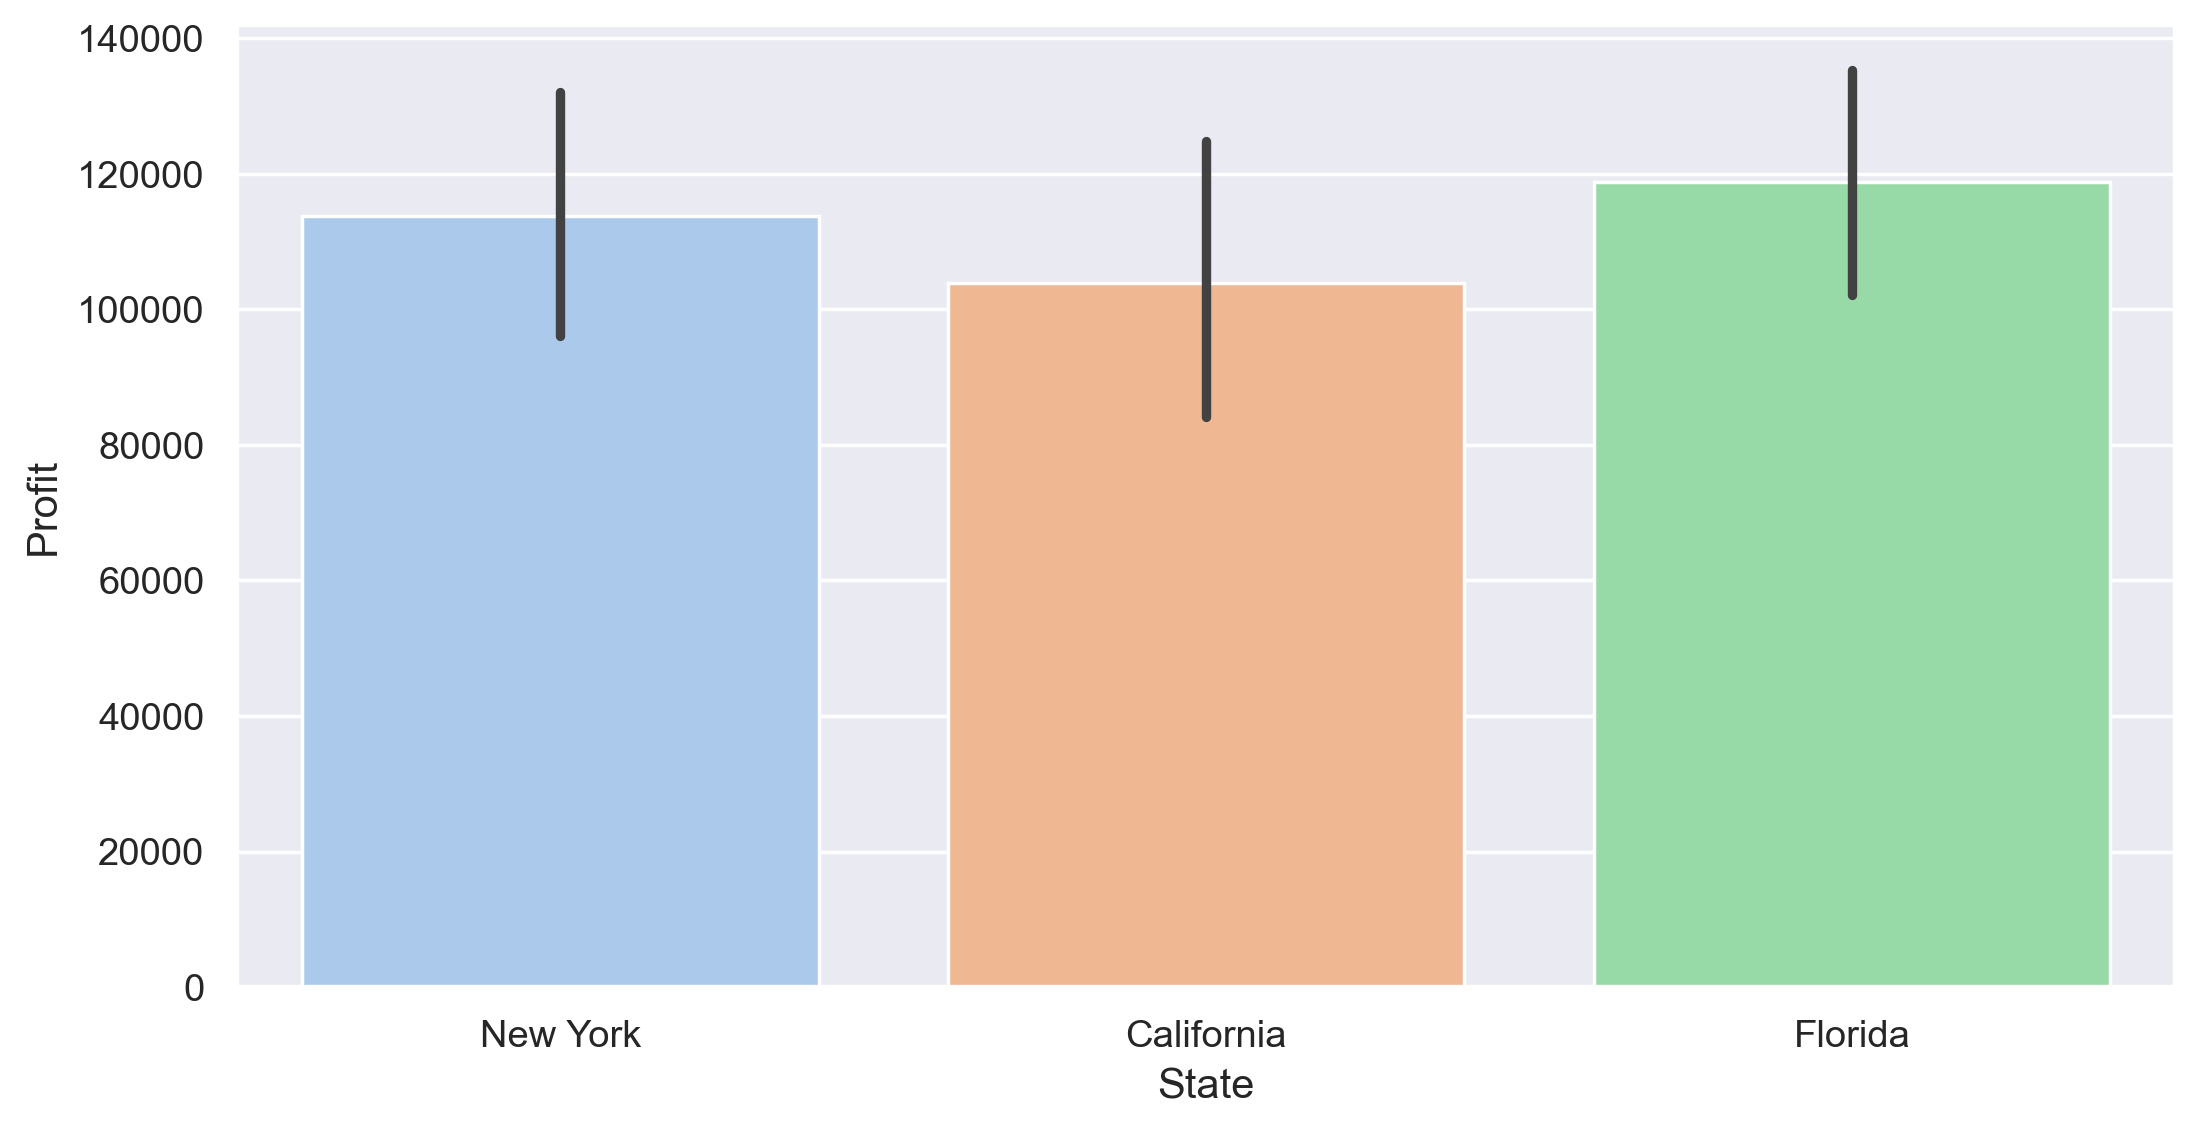

In [16]:
sns.barplot(x= df['State'], y= df['Profit'])

<AxesSubplot:xlabel='State', ylabel='Profit'>

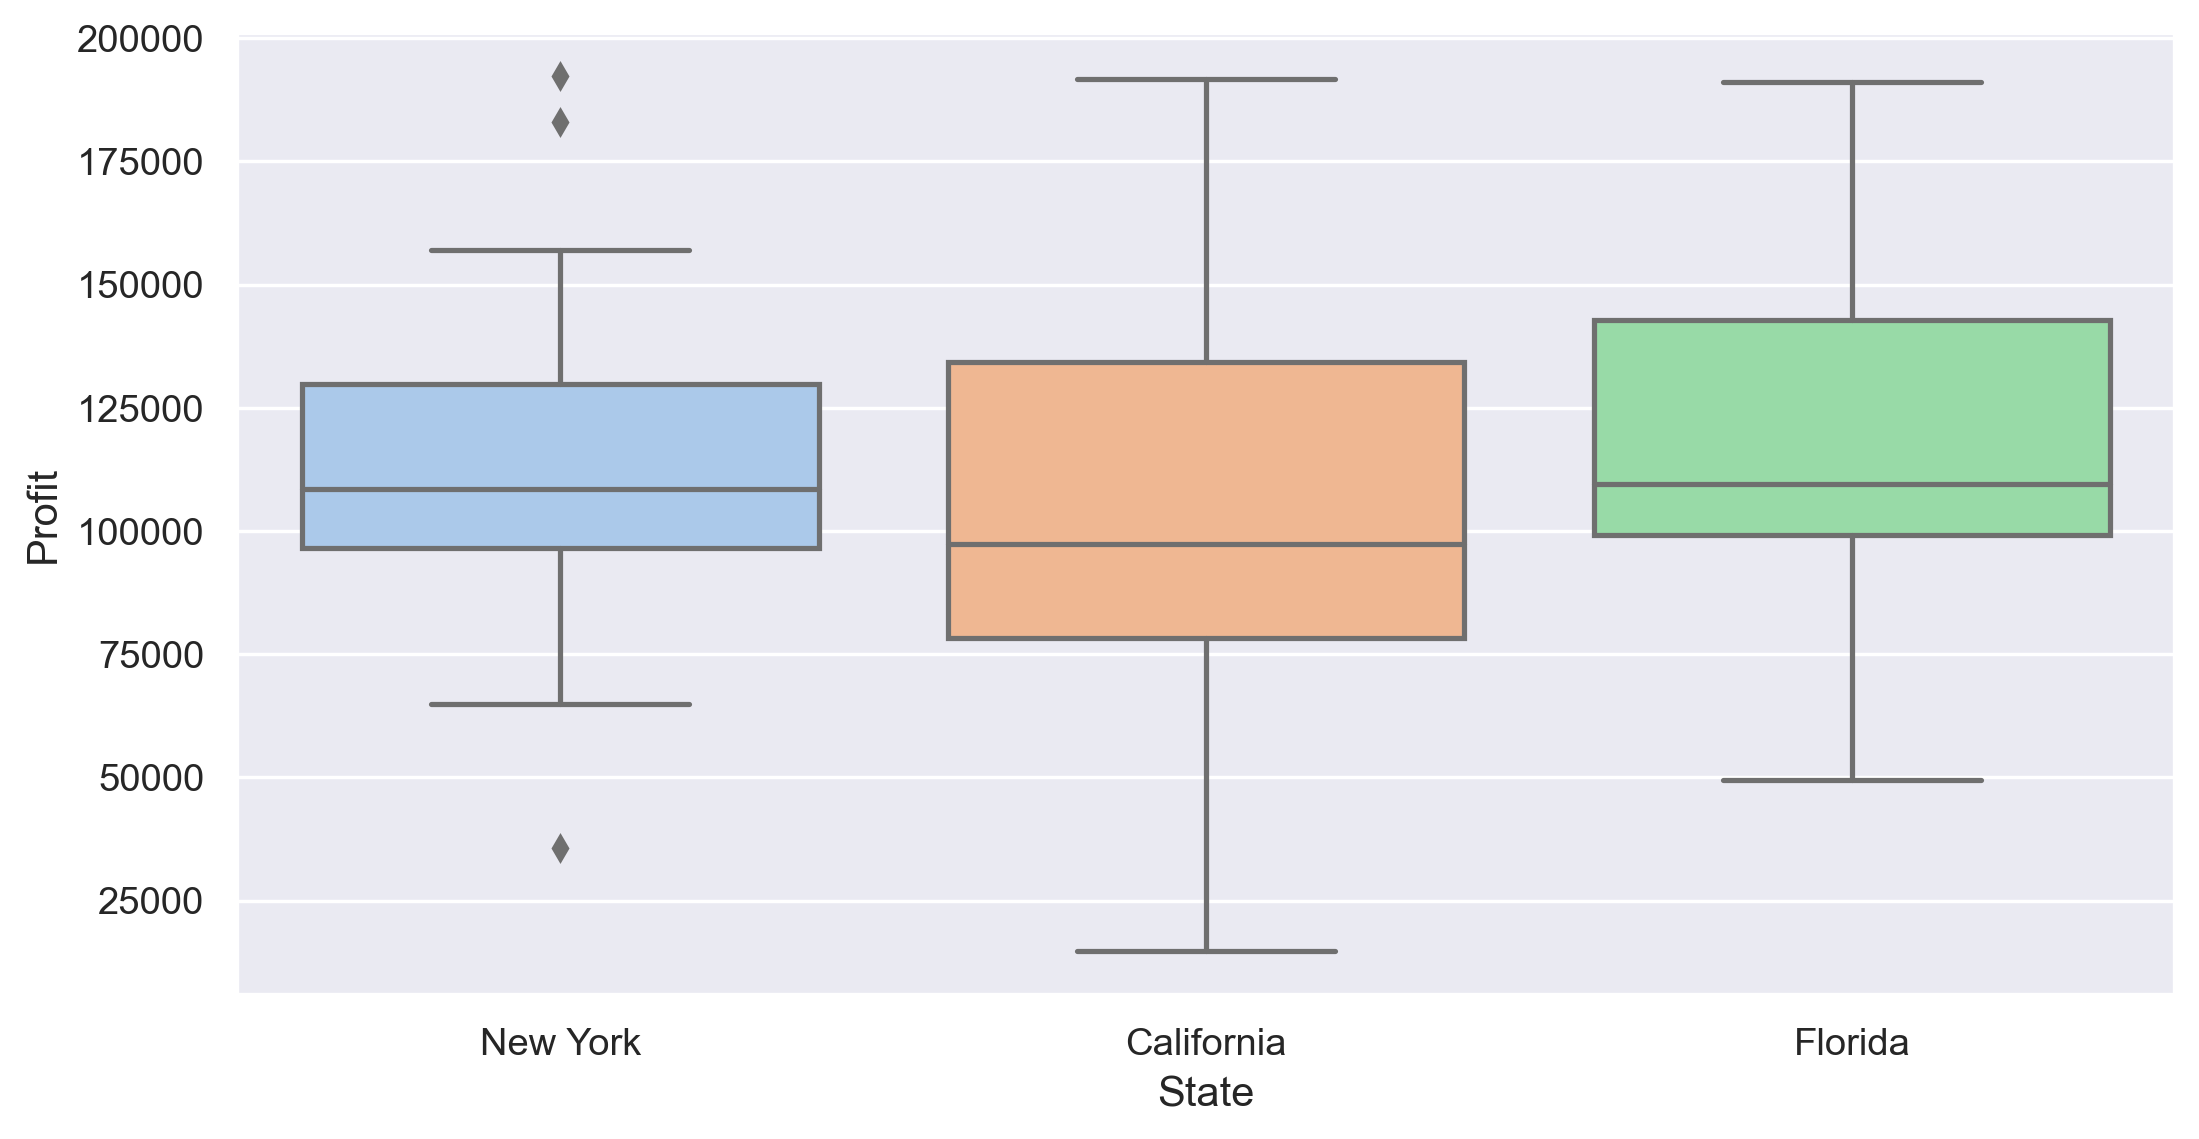

In [17]:
sns.boxplot(y = df['Profit'], x= df['State'])

> * #### Whether the sum of Profit with respect to State is nearly same as per Bar-chart, we can't neglect the variance of Profit with respect to State as seen in Box-plot at this Stage.
> * #### Califonia have high range of Profit, New York have Low Variance with espect to Profit.
> * #### If the variance in "Profit" range is high then the risk of starting Startup in that state is also high.

> *  #### Now to get correlation value of independent variables with our target variable let's go for Correlation Matrix.

<br>

* ##### <U>Correlation Matrix</U>

<AxesSubplot:>

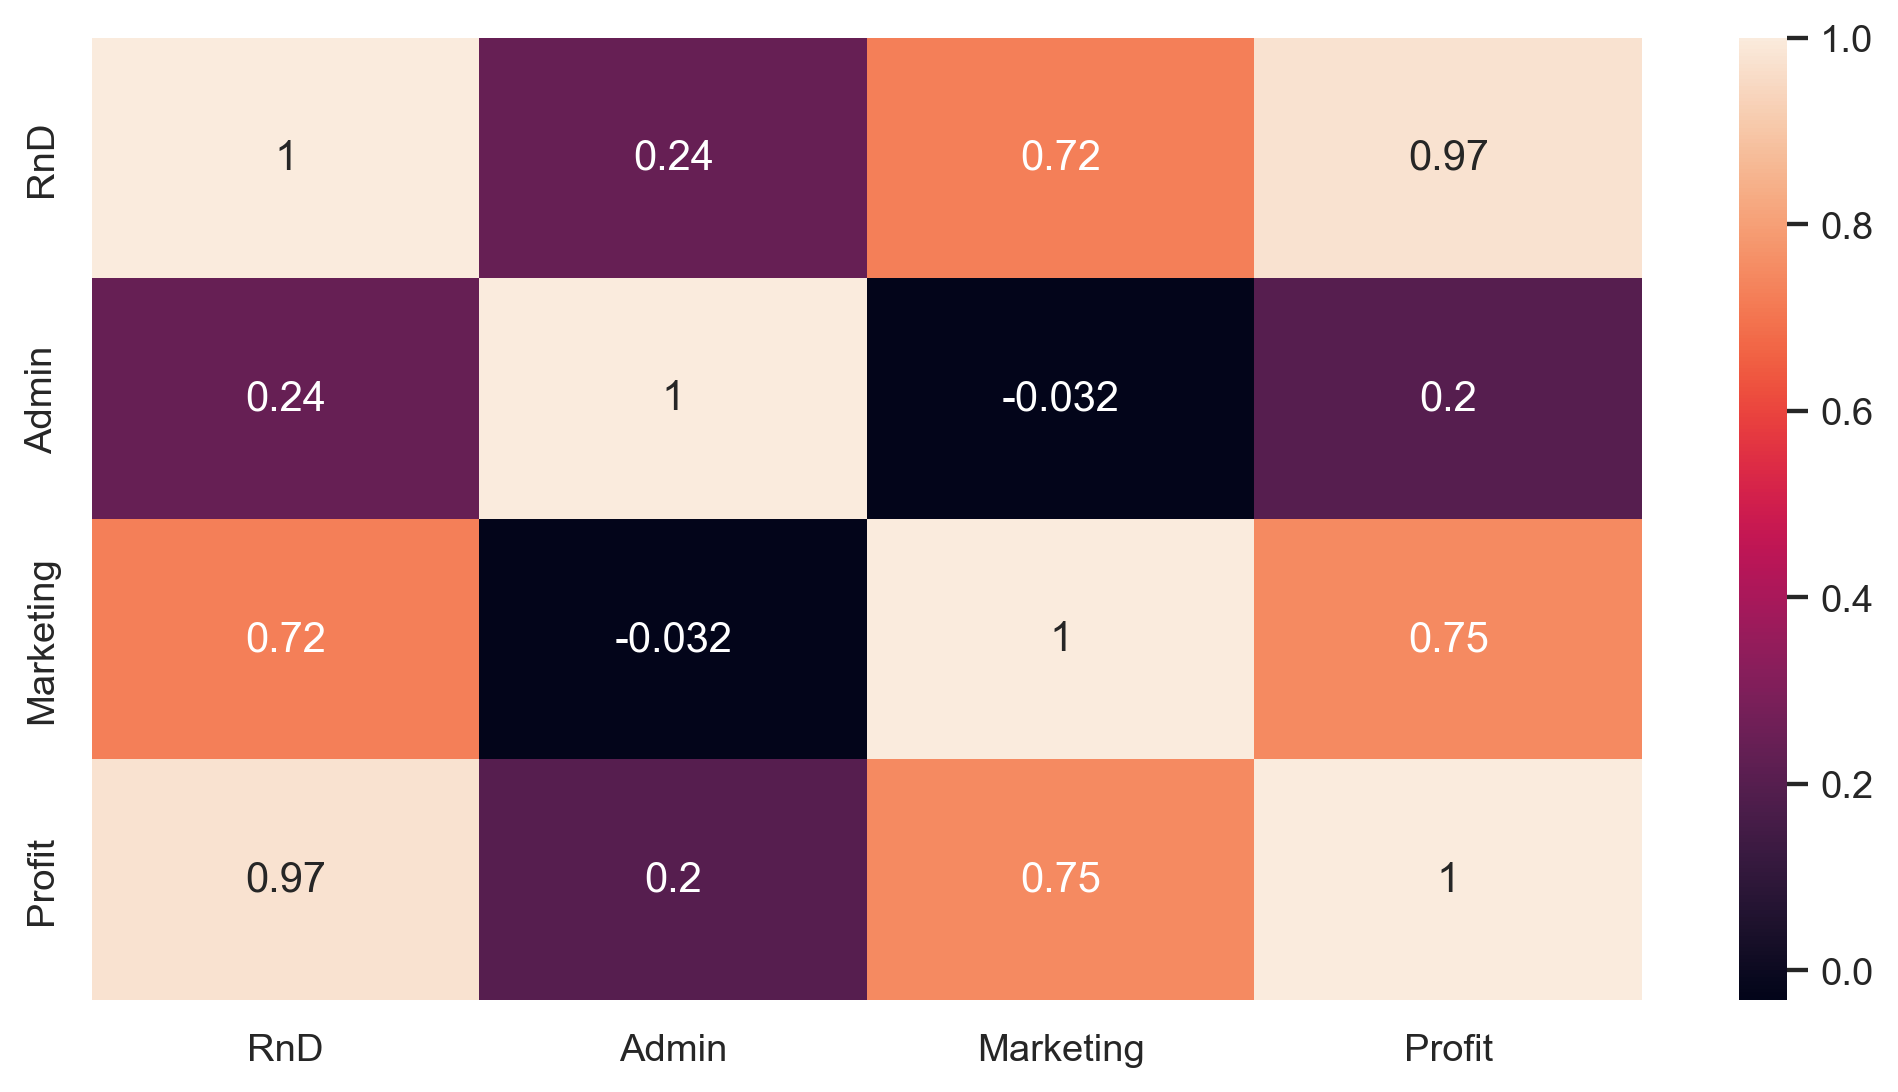

In [18]:
sns.heatmap(df.corr(), annot=True)

> * #### Here we can see "RnD" and "Marketing" Variables have very good amount of correlation with our target variable "Profit".
> * #### But "Admin" have not much correlation with "Profit".
> * #### Additionally Independent variables "RnD" and "Marketing" have 72% of Correlation, which are signs of Multicollinearity.

* ### <font color = 'blue'> <u> DETECTION OF MULTICOLLINEARITY </u>

* ##### <u>With P-Value </u>

  #### Let's Build Model Without Considering "State" variable (model_1) as we are building model to detect Multicollinearity.

In [19]:
import statsmodels.formula.api as smf

* ### <font color ='red'>  model_1
    - #### Without "State" variable

In [20]:
model_1 = smf.ols('Profit~RnD+Admin+Marketing', data= df).fit()

In [21]:
#Model_1 Accuracy 
model_1_r2, model_1_Adjr2 = model_1.rsquared, model_1.rsquared_adj
print(model_1_r2)
print(model_1_Adjr2)

0.9507459940683246
0.9475337762901719


In [22]:
# p-value
model_1.pvalues

Intercept    1.057379e-09
RnD          2.634968e-22
Admin        6.017551e-01
Marketing    1.047168e-01
dtype: float64

> * #### Here we got Intercept value and p-values of Slope for best fit line, i.e. Regression Line of target and predictors.
> * #### p-values are probability values for Hypothesis Test, if any independent variable contributing to target variable must have some slope value. 
> * #### For Hypothesis Test Null Hypothesis is slope = 0 and Alternate Hypothesis is Slope ≠ 0  
> * #### When p-value is less than alpha value i.e. 0.05  then we reject Null Hypothesis, that implies there is relationship between our target variable and independent variable.
> * #### Also we check Multicollinearity of any two independent variables by their p-values if they are more than alpha but in  correlation analysis we see there is relation with target variable then such independent variables must have Multicollinearity between them.
> * #### Here p-value for Admin = 0.6 and Marketing = 0.1, which are greater than alpha. 
> * #### But in correlation analysis "Marketing" and "Profit" have 75% of correlation this is the sign of Multicollinearity.
> * #### Let's try Variance Inflation Factor to Confirm Multicollinearity.

* ##### <U>Calculating VIF (Variance Inflation Factor)</U>

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
data_vif = df.iloc[:,0:3]

In [25]:
data_vif.head()

,RnD,Admin,Marketing
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [26]:
vif = pd.DataFrame()

vif['VIF_value'] = [variance_inflation_factor(data_vif.values,i) for i in range(len(data_vif.columns))]

vif['Variables'] = data_vif.columns

vif

,VIF_value,Variables
0,8.384571,RnD
1,4.026406,Admin
2,7.593984,Marketing


> * #### Here we compare all VIF Values of Independent Variables. If VIF values are near to each other then those independent variables have Multicollinearity Problem.
> * #### As we see "Marketing" and "RnD" have close VIF values.
> * #### Also there is good amount of correlation between them i.e. 72%
> * #### Let's try to build model with considering Multicollinearity.

* ### <font color = 'blue'> <u> SUBSET SELECTION </u>

* ##### In above model (model_1) we didn't considered categorical variable "State". Now build new model with transforming data. 

In [27]:
df = pd.get_dummies(df, columns=['State'])

In [28]:
df.head()

,RnD,Admin,Marketing,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [29]:
df.rename(columns={'State_California':'St_Cal', 'State_Florida':'St_Flo', 'State_New York':'St_New'}, inplace=True)
df.head(2)

,RnD,Admin,Marketing,Profit,St_Cal,St_Flo,St_New
0,165349.2,136897.80,471784.10,192261.83,0,0,1
1,162597.7,151377.59,443898.53,191792.06,1,0,0


### <font color ='red'>  model_2 
- #### With all variables 

In [30]:
model_2 = smf.ols('Profit~RnD+Admin+Marketing+St_Cal+St_Flo+St_New', data= df).fit()

In [31]:
# model_2 Accuracy 
model_2_r2 = model_2.rsquared
model_2_Adjr2 = model_2.rsquared_adj
print(model_2_r2)
print(model_2_Adjr2)

0.9507524843355148
0.945156175737278


> * #### As compared to model_1 without Categorical Variable "State" we get almost same Accuracy Value, i.e. 95.07%.
> * #### So let's Negelect "State" variable for further model building.

### Now let's check Multicollinearity for Variables "Marketing" and "RnD"

### <font color ='red'>  model_3
- #### For "RnD" Without "Marketing"

In [32]:
model_3 = smf.ols('Profit~RnD+Admin', data=df).fit()

In [33]:
# model_3 Accuracy
model_3_r2 = model_3.rsquared
model_3_Adjr2 = model_3.rsquared_adj
print(model_3_r2)
print(model_3_Adjr2)

0.9478129385009173
0.9455922124796797


* > #### model_3 without "Marketing" reduces the accuracy 95% to 94% 

### <font color ='red'>  model_4
- #### For "Marketing" Without "RnD"

In [34]:
model_4 = smf.ols('Profit~Marketing+Admin', data=df).fit()

In [35]:
# model_4 Accuracy
model_4_r2 = model_4.rsquared
model_4_Adjr2 = model_4.rsquared_adj
print(model_4_r2)
print(model_4_Adjr2)

0.6097229746770663
0.593115441684601


> * #### High decrease in r2 value implies "RnD" variable is Important for prediction.
> * #### Let's try model only with "RnD" Variable.

### <font color ='red'>  model_5
- #### Only for "RnD"

In [36]:
model_5 = smf.ols('Profit~RnD', data=df).fit()

In [37]:
# model_5 Accuracy
model_5_r2 = model_5.rsquared
model_5_Adjr2 = model_5.rsquared_adj
print(model_5_r2)
print(model_5_Adjr2)

0.9465353160804392
0.9454214684987816


* > #### Only with "RnD" variable we get very good amount of Accuracy. This shows that "RnD" have high impact on our target variable "Profit"

### <font color ='red'>  model_6
- #### Neglecting "Admin"

In [38]:
model_6 = smf.ols('Profit~RnD+Marketing', data=df).fit()

In [39]:
# model_6 Accuracy
model_6_r2 = model_6.rsquared
model_6_Adjr2 = model_6.rsquared_adj
print(model_6_r2)
print(model_6_Adjr2)

0.9504503015559763
0.9483418037498477


> * #### As we seen in correlation analysis "Admin" variable have very low impact on our target variable "Profit", r2 value is also not much impacted without "Admin" variable.

### <font color ='red'> Table of r square values

In [40]:
table  = pd.DataFrame({
    'Model' : ['model_1','model_2','model_3','model_4','model_5','model_6'],
    'Description' : ['Without State','With All Variables','For RnD Without Marketing','For Marketing Without RnD',
                     'Only RnD','Negelecting Admin'],
    'r2 Value' : [model_1_r2, model_2_r2, model_3_r2, model_4_r2, model_5_r2, model_6_r2 ],
    'adj_r2' : [model_1_Adjr2, model_2_Adjr2, model_3_Adjr2, model_4_Adjr2, model_5_Adjr2, model_6_Adjr2 ]
    
})

In [41]:
table

,Model,Description,r2 Value,adj_r2
0,model_1,Without State,0.950746,0.947534
1,model_2,With All Variables,0.950752,0.945156
2,model_3,For RnD Without Marketing,0.947813,0.945592
3,model_4,For Marketing Without RnD,0.609723,0.593115
4,model_5,Only RnD,0.946535,0.945421
5,model_6,Negelecting Admin,0.950450,0.948342


> *  #### Here as we see with "RnD" and "Marketing" variables only we get almost same r2 value and adjusted r2 value compared to model with all variabes.
> * #### So we consider last model i.e. model_6 for further analysis.

* ### <font color = 'blue'> <u> MODEL VALIDATION TECHNIQUE (RESIDUAL ANALYSIS) </u>

* ### <u>To check performance of Model there are some Assumptions about Errors:</u> 
#### 1. Errors should be Independently and Identically distributed. (Q-Q Plot)
#### 2. There should present constant variance in error. (Homoscedascticity)
#### 3. Mean of Errors should be zero. (Residual Vs Regressor Plot)

##### 1.<U> Normality Test</u>

In [42]:
import statsmodels.api as sm

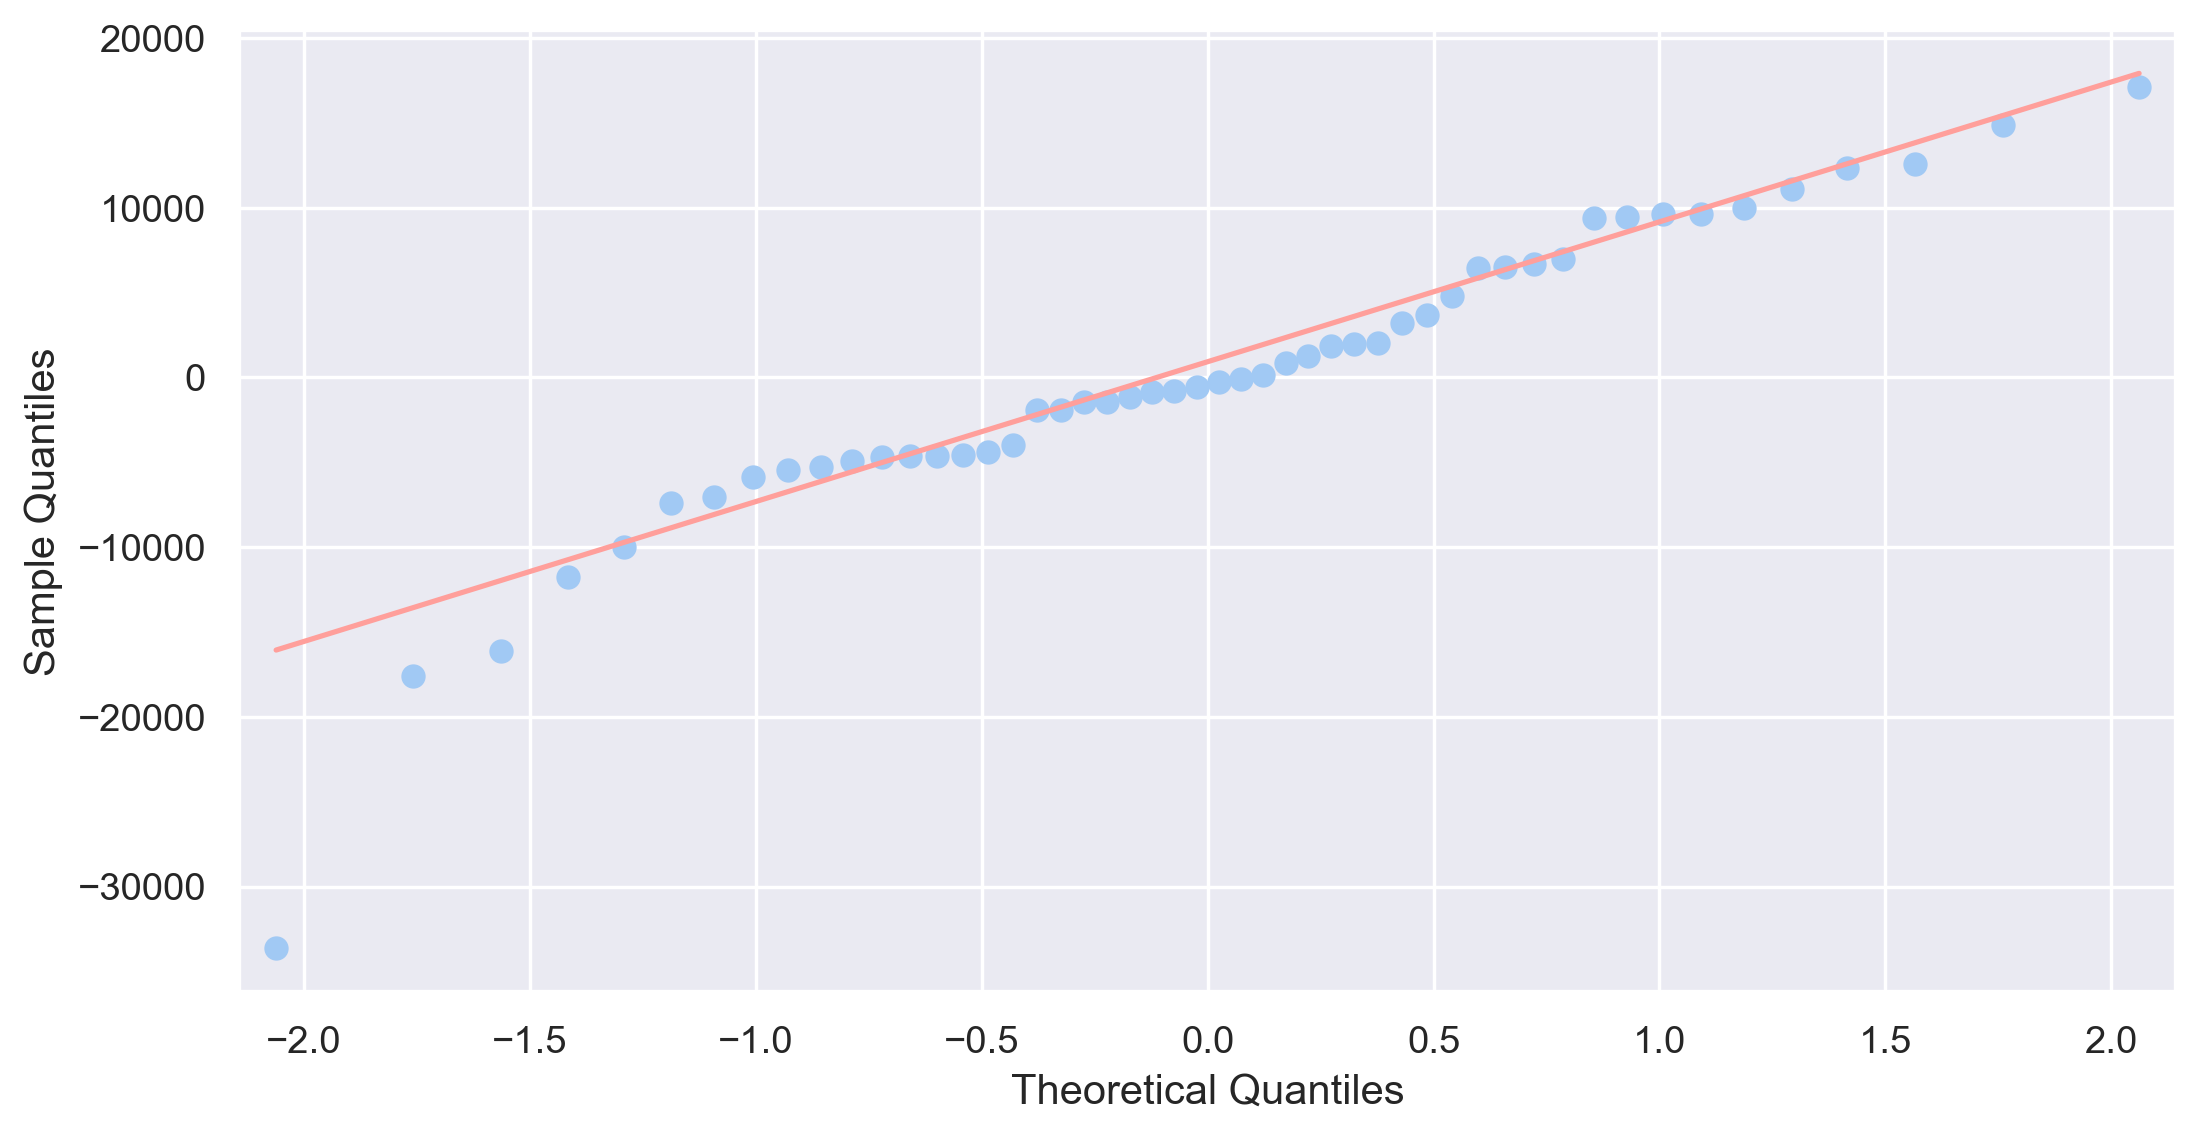

In [43]:
#Q-Q Plot
sm.qqplot(model_6.resid, line='q');

In [44]:
# Get index for residuals lower than -30000
np.where(model_6.resid < -30000)

(array([49], dtype=int64),)

> * #### As we see in Q-Q Plot residuals follows nearly normal distribution. 
> * #### Error of datapoint with index number 49 is much away from line. It may be influencer data point.

<br>

##### 2. <u> Residual plot of Homoscedasticity<u>

- Homoscedasticity can be checked by plotting a scatter plot between fitted values(ŷ) and residuals(e).

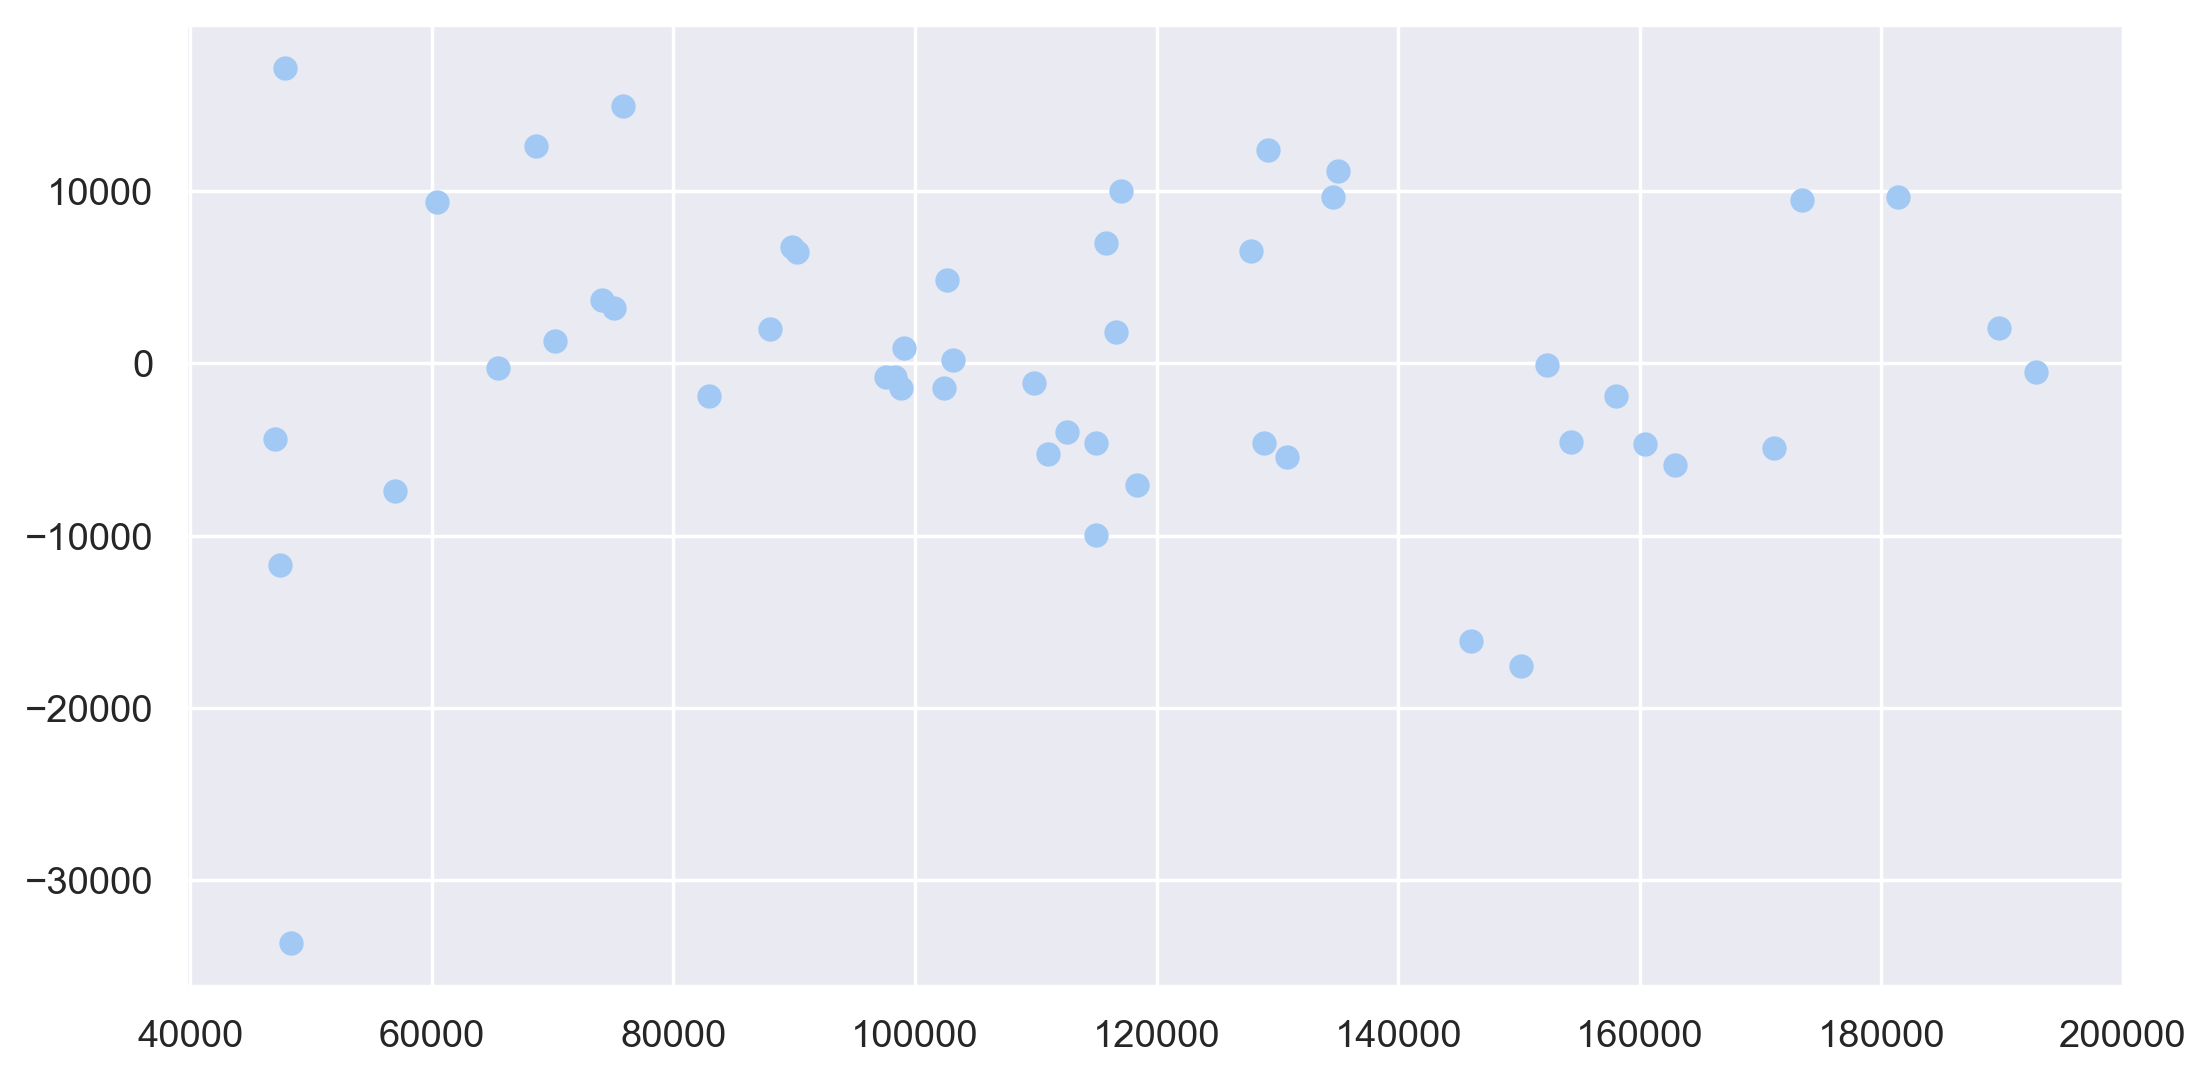

In [45]:
plt.scatter(model_6.fittedvalues, model_6.resid)

> * #### In above scatter plot we can't see clearly any proper pattern, i.e. there is constant variance in error.
> * #### Error should not vary with respect to independent variable.

<br>

##### 3. <u> Residual Vs Regressor Plot <u>

- Mean of errors should be zero i.e. slope = 0

eval_env: 1


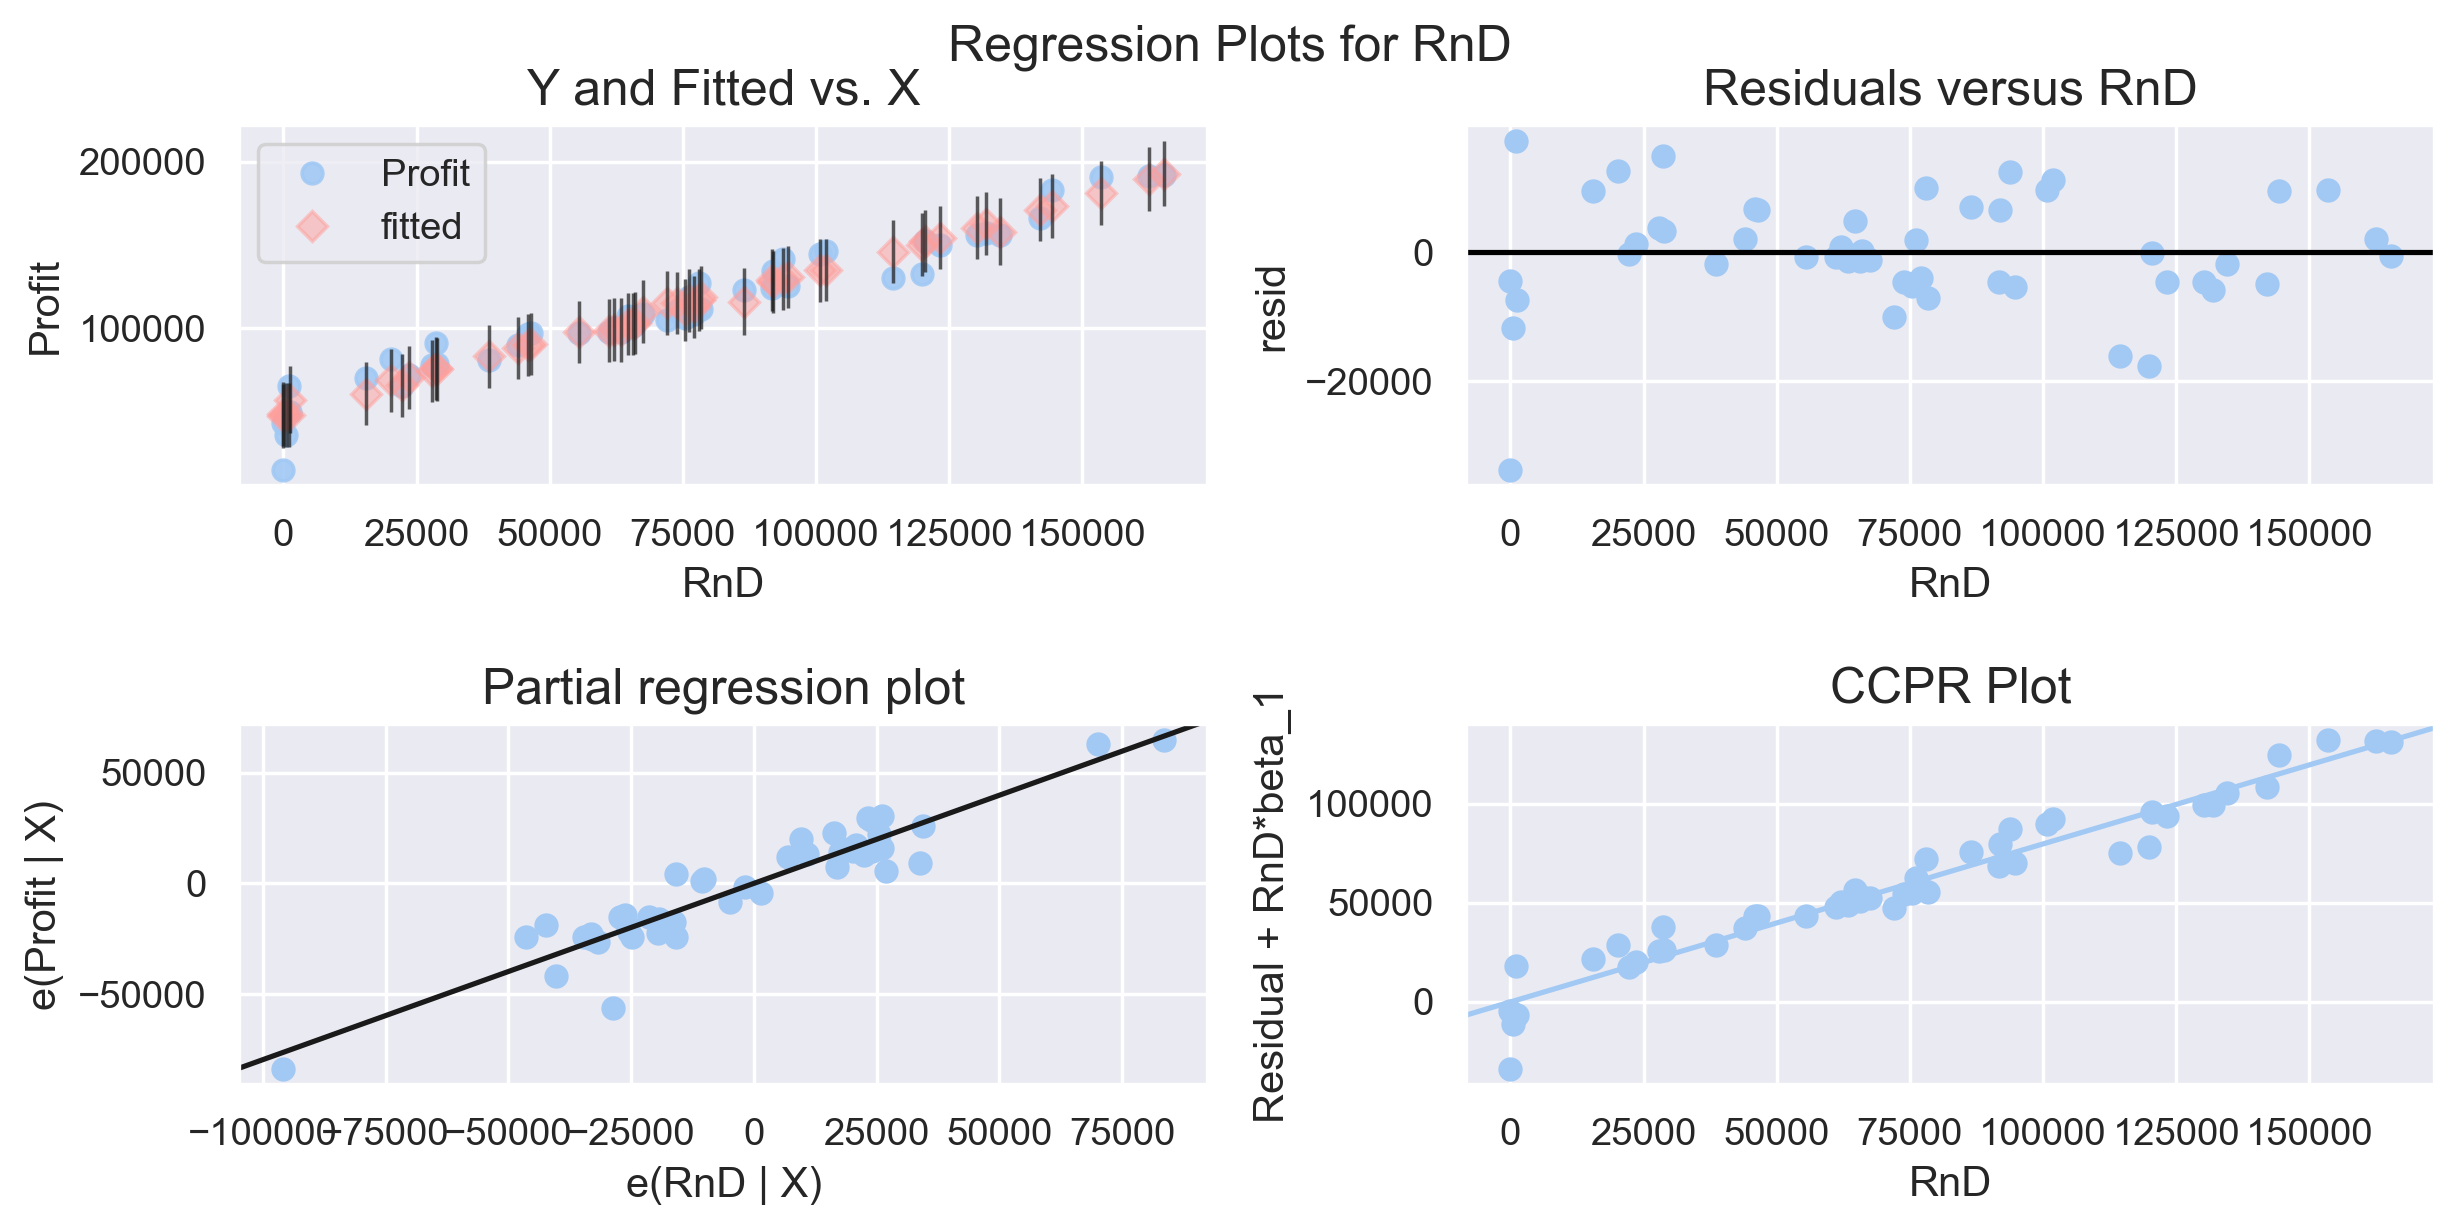

In [46]:
# Residuals Vs RnD
sm.graphics.plot_regress_exog(model_6,'RnD');

eval_env: 1


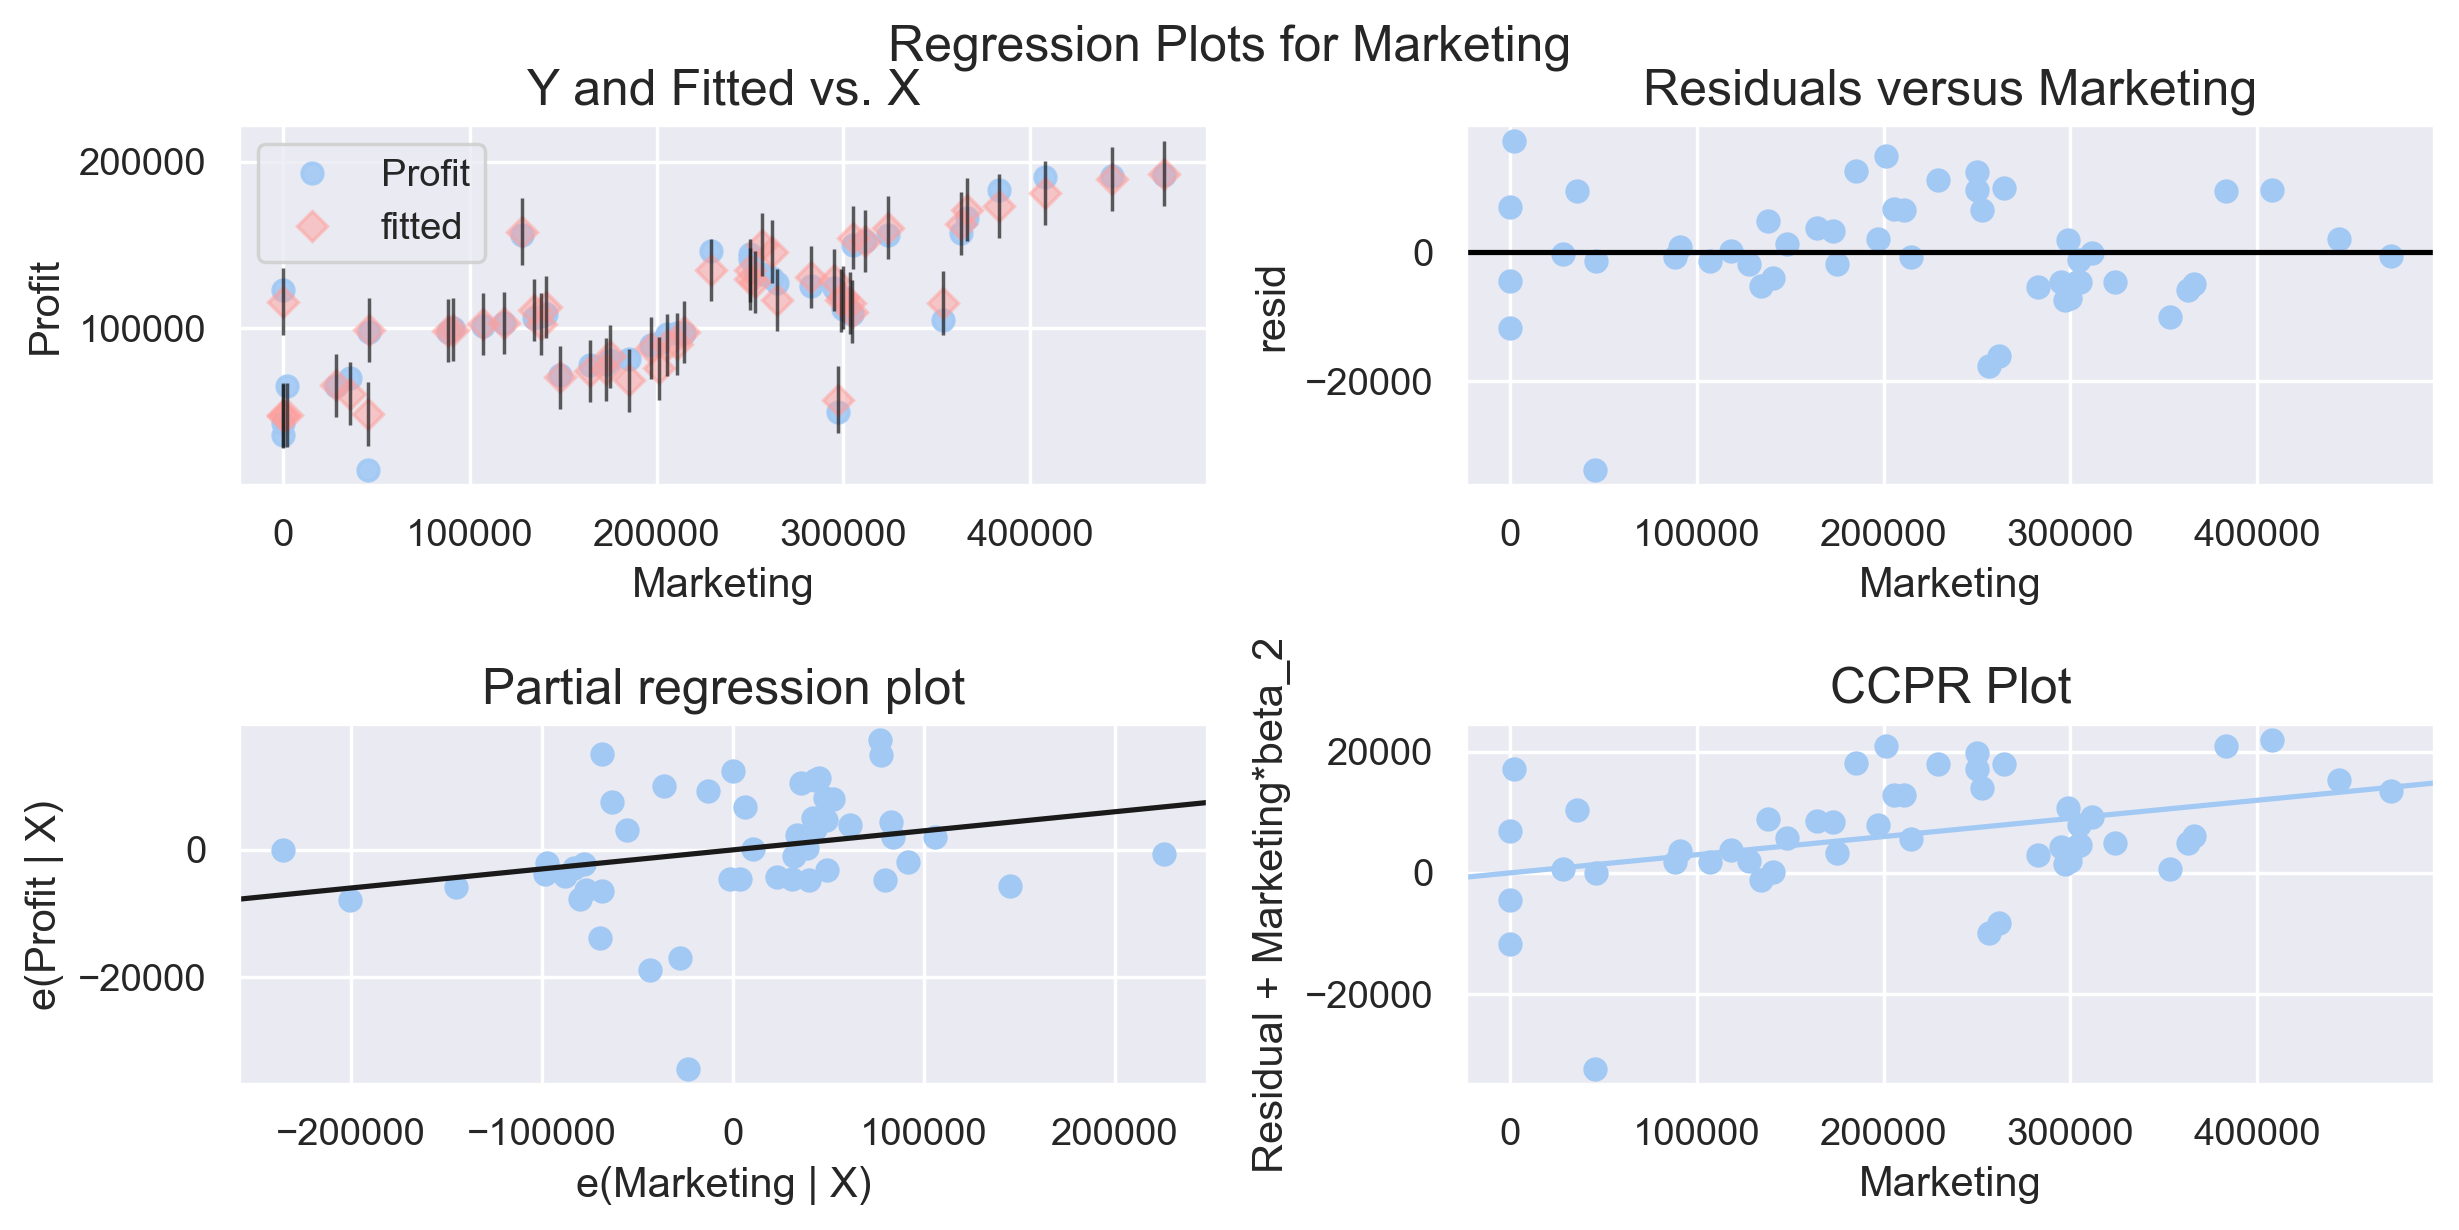

In [47]:
# Residuals Vs Marketing
sm.graphics.plot_regress_exog(model_6,'Marketing');

 > * #### Both Residuals Vs Regressors plot have slope = 0 i.e. Mean of Errors = 0.
 > * #### This assumption about Errors followed by our model.

* ### <font color = 'blue'> <u> MODEL DELETION DIAGNOSTICS (DETECTING INFLUENCERS) </u>

* ##### <u> Cook's Distance </u>:

    - All Outliers are not Influencers.
    - <u>Influence Data Points</u> are those data points which cause huge change in slope value of Regressor Line. 
    - <u>Outliers</u> are those records where Extreme values present in dependent variable whether don't have extreme data point with respect to independent variable.
    - <u>Leverage Data Points</u> are those records where Extreme values present in independent variable whether don't have extreme data point with respect to dependent variable.

In [48]:
inf = model_6.get_influence()
c,p = inf.cooks_distance

<StemContainer object of 3 artists>

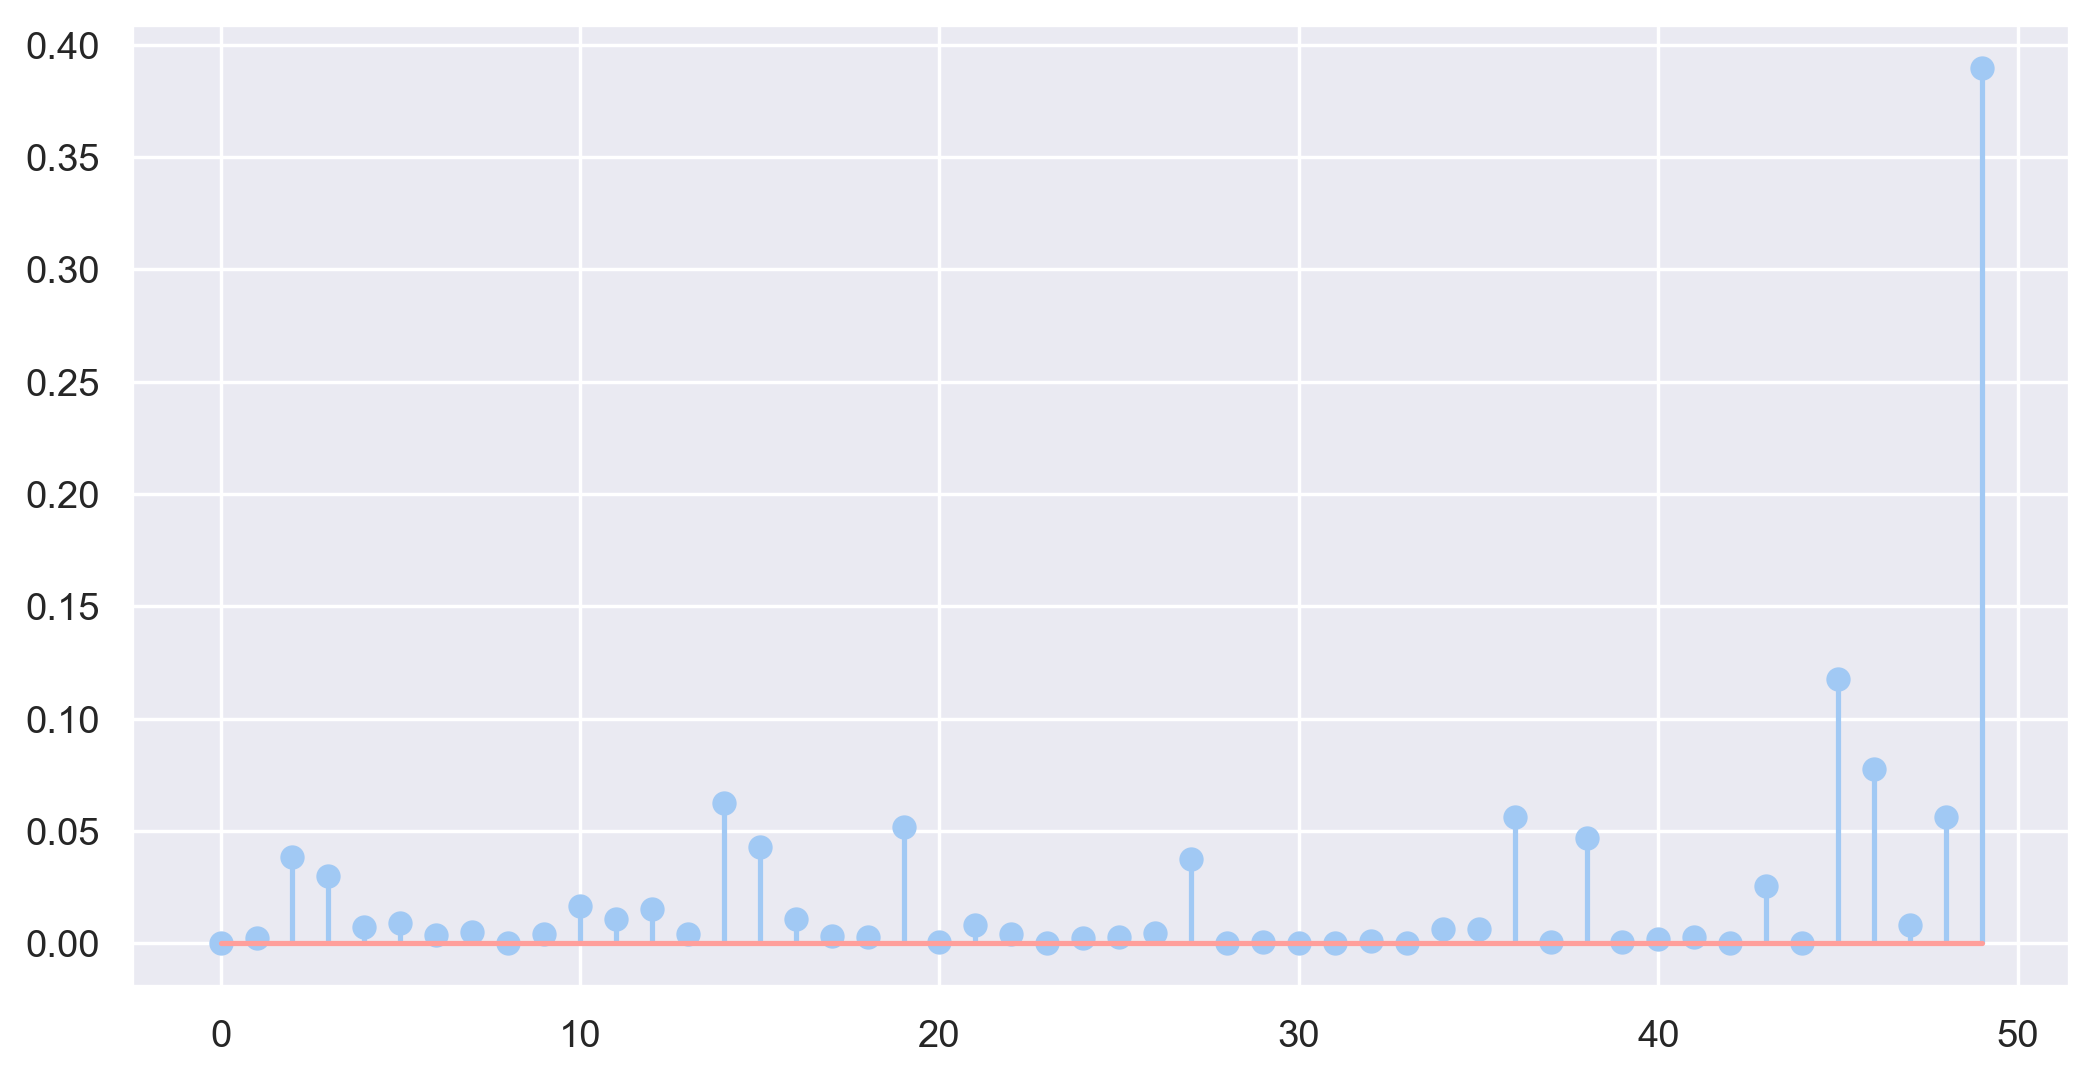

In [49]:
# Cook's Distance Plot
plt.stem(c)

In [50]:
# Maximum value of cooks distance with Index number of Record 
np.argmax(c), np.max(c)

(49, 0.3894886227924922)

In [51]:
# Cook's Distance greater than one is generally considered as threshold 
np.where(c>1)

(array([], dtype=int64),)

> * #### No cook's Distance have value more than 1.
> * #### Let's go for Influence plot.

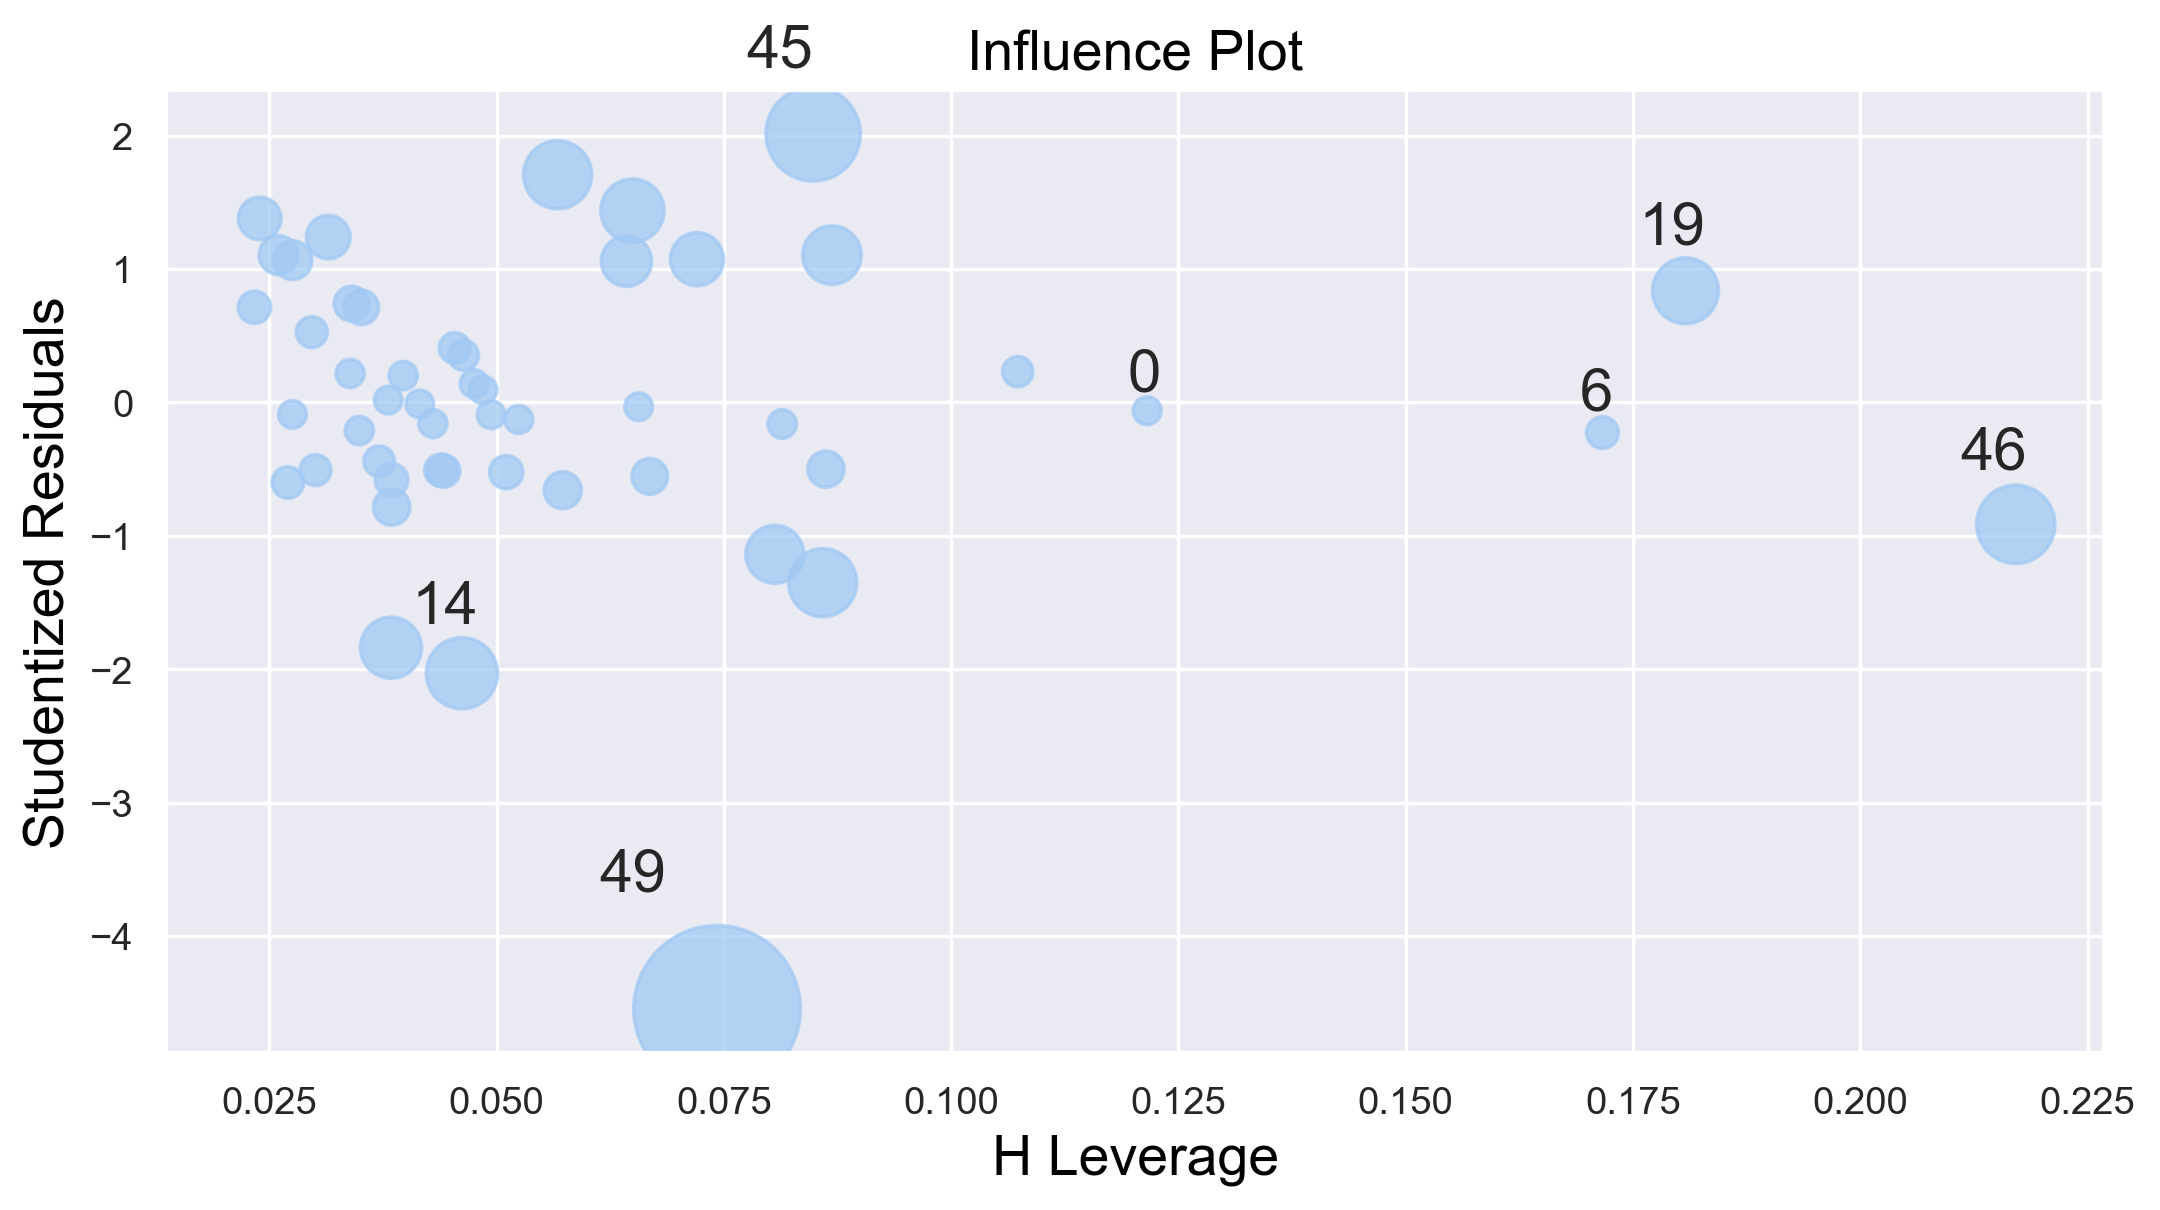

In [52]:
#Influence Plot
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_6);

> * #### As we can see in influence plot also data-point with index 49 have influencing effect.
> * #### Also in cook's distance plot and Q-Q plot data data-point with index 49 is deviated.
> * #### Let's calculate threshold value for Leverage data-points.

In [53]:
# Leverage_cutoff:
k = 3 # k= No of columns
n = len(df)
leverage_cutoff = 3*(k+1)/n
print('Cutoff value for Leverage is:',leverage_cutoff)

Cutoff value for Leverage is: 0.24


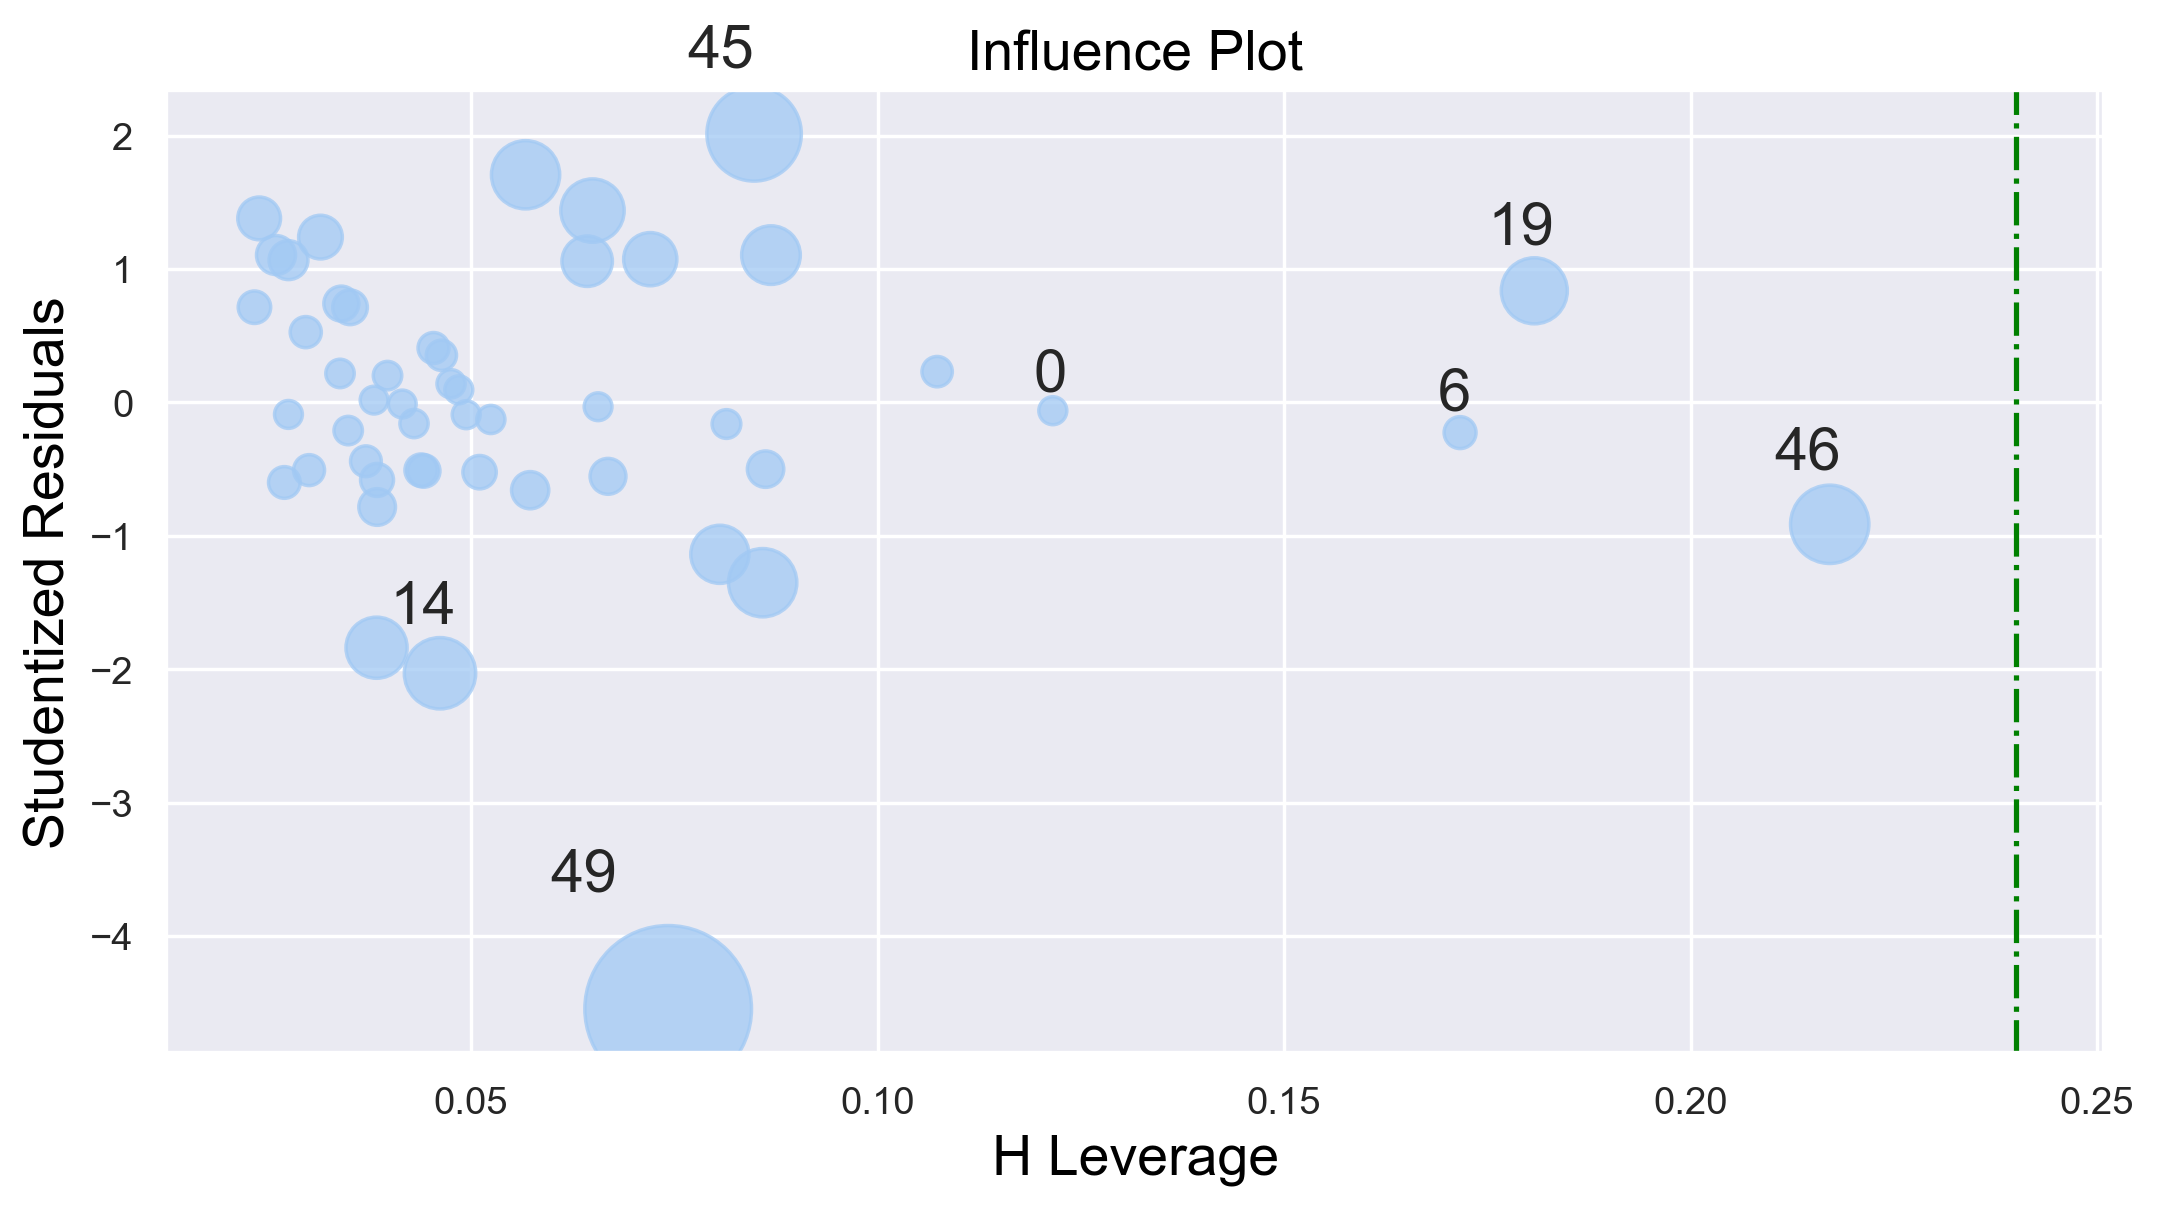

In [54]:
influence_plot(model_6);
plt.axvline(leverage_cutoff, color= 'green', linestyle ='-.')

> * #### No data point excede Leverage cutoff still check model performance after dropping data-point with index 49.

In [55]:
df.shape

(50, 7)

In [56]:
# Drop Data Point 49
new_data = df.drop(index=[49])
new_data.shape

(49, 7)

In [57]:
# Model with new dataset (model_new)
model_new = smf.ols('Profit~RnD+Marketing', data= new_data).fit()

In [58]:
# New Models Accuracy
model_new.rsquared, model_new.rsquared_adj

(0.9610856807456628, 0.9593937538215612)

In [59]:
# Compare new_model accuracy with model_6
model_6_r2, model_6_Adjr2

(0.9504503015559763, 0.9483418037498477)

> * #### Accuracy increased by 1% after removing influence data-point. So we select the last model(new_model) as final model with 96% of Accuracy.

* ### <font color = 'blue'> <u> PREDICTING PROFIT FOR NEW DATA </u>

In [60]:
df.head(6)

,RnD,Admin,Marketing,Profit,St_Cal,St_Flo,St_New
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1


In [61]:
newdf = pd.DataFrame({
    'RnD' : [150000,130000,170000,120000],
    'Marketing' : [400000,300000,480000,280000]
})
newdf

,RnD,Marketing
0,150000,400000
1,130000,300000
2,170000,480000
3,120000,280000


In [62]:
newdf['Predicted_Profit'] = model_new.predict(newdf)
newdf

,RnD,Marketing,Predicted_Profit
0,150000,400000,177071.053650
1,130000,300000,158818.825317
2,170000,480000,194774.371771
3,120000,280000,150516.076467


 ### Conclusion : 
 * #### Investment in Research and development is directly proportional to the Profit of Startups. 
 * #### One can allot more percentage of Finance to Research and Development Department compared to other departments.
 * #### Model gives idea about investment to Startups to achive maximum profit.

<br>
<br>
<br>

> # <u>END</u>
___